# Airbnb New User Bookings Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/airbnb-recruiting-new-user-bookings

/content/drive/MyDrive/airbnb-recruiting-new-user-bookings


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ndcg_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from pandas.core.common import random_state
from sklearn.metrics import confusion_matrix
import warnings
#warnings.filterwarnings('ignore')


import warnings
#warnings.filterwarnings('ignore')



# Load Data

In [ ]:
df_age_gender = pd.read_csv("age_gender_bkts.csv")
df_countries = pd.read_csv("countries.csv")
df_sessions = pd.read_csv("sessions.csv")
df_test_users = pd.read_csv("test_users.csv")
df_train_users = pd.read_csv("train_users_2.csv")

In [ ]:
#get rows and columns
print("The df_age_gender dataset has {} rows and {} columns".format(df_age_gender.shape[0], df_age_gender.shape[1]))
print("The df_countries dataset has {} rows and {} columns".format(df_countries.shape[0], df_countries.shape[1]))
print("The df_sessions dataset has {} rows and {} columns".format(df_sessions.shape[0], df_sessions.shape[1]))
print("The df_train_users dataset has {} rows and {} columns".format(df_train_users.shape[0], df_train_users.shape[1]))
print("The testing dataset has {} rows and {} columns".format(df_test_users.shape[0], df_test_users.shape[1]))

The df_age_gender dataset has 420 rows and 5 columns
The df_countries dataset has 10 rows and 7 columns
The df_sessions dataset has 10567737 rows and 6 columns
The df_train_users dataset has 213451 rows and 16 columns
The testing dataset has 62096 rows and 15 columns


In [ ]:
df_age_gender

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
...,...,...,...,...,...
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0


In [ ]:
df_countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [ ]:
df_sessions.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [ ]:
df_train_users.head(7)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


* All the users in this dataset are from the USA


# Exploratory Data Analysis

## df_train_users data 

### Basic information and description of training data

In [ ]:
df_train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

We notice that there are null values in columns: "date_first_booking", "age and "first_affiliate_tracked". Specifically, column "date_first_booking" has a lot of null values. We will take care of these in the further sections. 

In [ ]:
df_train_users.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


### Unique value count

In [ ]:
#unique values
df_train_users.nunique().sort_values(ascending = False)

id                         213451
timestamp_first_active     213451
date_first_booking           1976
date_account_created         1634
age                           127
first_browser                  52
language                       25
affiliate_provider             18
signup_flow                    17
country_destination            12
first_device_type               9
affiliate_channel               8
first_affiliate_tracked         7
gender                          4
signup_app                      4
signup_method                   3
dtype: int64

Looks like gender has 4 unique values. We also noticed that it has :"unknown-" as one of its value. Let us further check this column.

In [ ]:
df_train_users["gender"].value_counts()


-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [ ]:
df_train_users["age"].sort_values()

83117     1.0
194600    1.0
84865     2.0
5749      2.0
191312    2.0
         ... 
213442    NaN
213444    NaN
213447    NaN
213449    NaN
213450    NaN
Name: age, Length: 213451, dtype: float64

In [ ]:
#replacing gender and age values which are not present to Nan
df_train_users.gender.replace('-unknown-',np.nan, inplace=True)
df_test_users.gender.replace('-unknown-',np.nan, inplace=True)

### Percent missing data

In [ ]:
#training data missing values
def percent_missing(data):
    '''
    input: Dataframe  
    output: Percentage of missing values in each column
    '''
    #replace blank entries with nan
    data = data.replace(' ', np.nan)
    data = data.replace("NaN", np.nan)

    per = data.isna().sum() * 100 / len(data)
    missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': per})
    return missing_value_df.sort_values(by = 'percent_missing', ascending = False)


In [ ]:
#missing training data percent in ascending order
print("Percentage of missing data in df_train_users")
print("\n")
print(percent_missing(df_train_users).iloc[0:6,:])
print("########################################################################")
print("\n")
print("Percentage of missing data in df_age_gender")
print("\n")
print(percent_missing(df_age_gender).iloc[0:6,:])
print("########################################################################")
print("\n")
print("Percentage of missing data in df_countries")
print("\n")
print(percent_missing(df_countries).iloc[0:6,:])
print("########################################################################")
print("\n")
print("Percentage of missing data in df_sessions")
print("\n")
print(percent_missing(df_sessions).iloc[0:6,:])
print("########################################################################")


Percentage of missing data in df_train_users


                                     column_name  percent_missing
date_first_booking            date_first_booking        58.347349
gender                                    gender        44.829024
age                                          age        41.222576
first_affiliate_tracked  first_affiliate_tracked         2.841402
id                                            id         0.000000
date_account_created        date_account_created         0.000000
########################################################################


Percentage of missing data in df_age_gender


                                     column_name  percent_missing
age_bucket                            age_bucket              0.0
country_destination          country_destination              0.0
gender                                    gender              0.0
population_in_thousands  population_in_thousands              0.0
year                                    

Apart from "df_train_users", we have "df_sessions" with null values in some of its columns. 

### Numerical and Categorical Variables in training data


In [ ]:
#convert dates to datetime object

df_train_users["date_account_created"] = pd.to_datetime(df_train_users["date_account_created"])
df_train_users["timestamp_first_active"] = pd.to_datetime(df_train_users["timestamp_first_active"])
#df_train_users["date_first_booking"] = pd.to_datetime(df_train_users["date_first_booking"])

In [ ]:
df_train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   object        
 4   gender                   117763 non-null  object        
 5   age                      125461 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  207386 non-null  object        
 12  signup_app      

In [ ]:
print('Features in the training data: ', df_train_users.columns)
print("\n")
cat_training =[]

for col in df_train_users.columns[1:]:
    if (df_train_users[col].dtype =='object'):
        cat_training.append(col)

print("########################################################################")
print('Categorical features in the data: \n', cat_training)

Features in the training data:  Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


########################################################################
Categorical features in the data: 
 ['date_first_booking', 'gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination']


Let us visualize how is the data distributed for categorical variables.

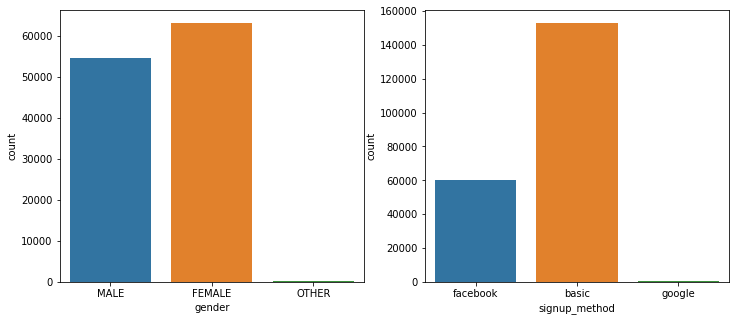

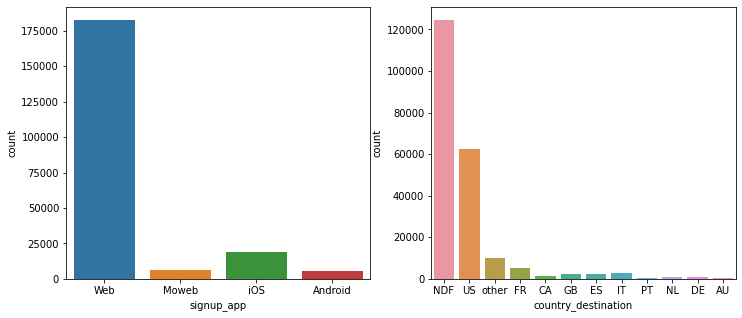

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(data = df_train_users, x = 'gender', ax=ax1)
sns.countplot(data = df_train_users, x = 'signup_method', ax=ax2)


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(data = df_train_users, x = 'signup_app', ax=ax1)
sns.countplot(data = df_train_users, x = 'country_destination', ax=ax2)

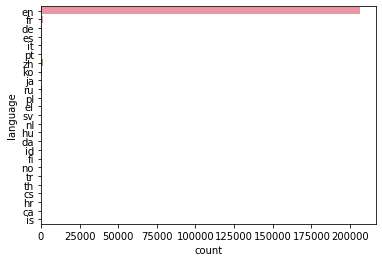

In [ ]:
sns.countplot(data = df_train_users, y = 'language')

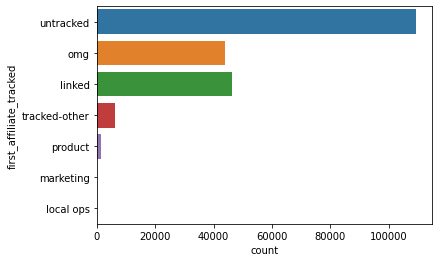

In [ ]:
sns.countplot(data = df_train_users, y = 'first_affiliate_tracked')

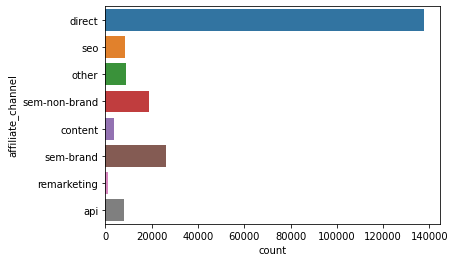

In [ ]:
sns.countplot(data = df_train_users, y = 'affiliate_channel')


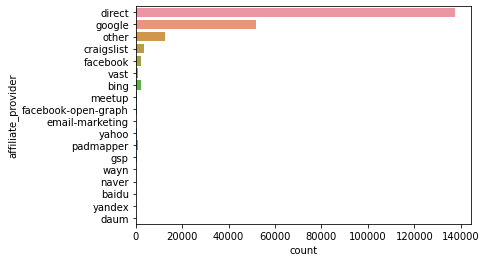

In [ ]:
sns.countplot(data = df_train_users, y = 'affiliate_provider')

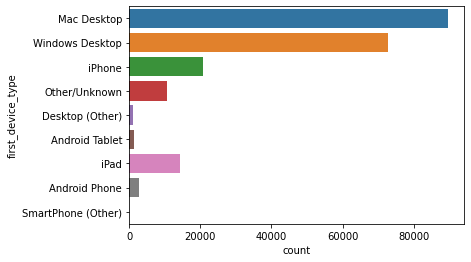

In [ ]:
sns.countplot(data = df_train_users, y = 'first_device_type')

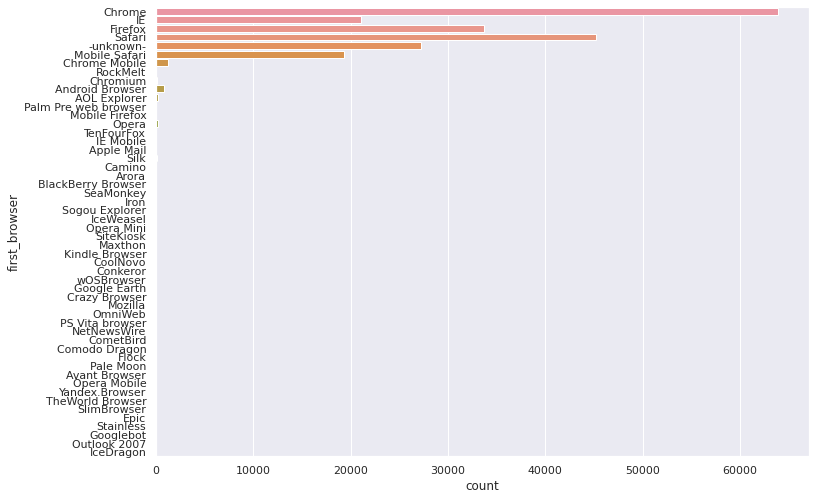

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = df_train_users, y = 'first_browser')

Let us check how id "age" column distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


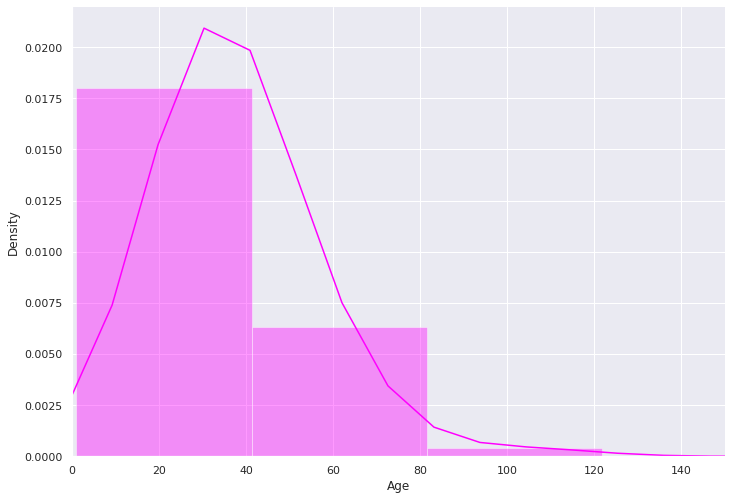

In [ ]:
sns.distplot(df_train_users["age"], color='#ff00ff')
plt.xlabel('Age')
plt.xlim([0, 150])
sns.despine()

In [ ]:
df_train_users["age"].max()

2014.0

In [ ]:
df_train_users["age"].value_counts().sort_values(ascending = True)

1926.0       1
1953.0       1
1938.0       1
2008.0       1
1995.0       1
          ... 
32.0      5855
28.0      5939
29.0      5963
31.0      6016
30.0      6124
Name: age, Length: 127, dtype: int64

In [ ]:
df_train_users[(df_train_users["age"] == 1926)]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
211496,025sv1949e,2014-06-27,1970-01-01 05:35:40.627043908,2014-07-11,FEMALE,1926.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US


In [ ]:
df_train_users[df_train_users['age'] > 120]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
388,v2x0ms9c62,2010-04-11,1970-01-01 05:35:00.411065602,2010-04-13,NaN,2014.0,basic,3,en,other,craigslist,untracked,Web,Windows Desktop,Firefox,FR
673,umf1wdk9uc,2010-05-25,1970-01-01 05:35:00.525155541,NaN,FEMALE,2014.0,basic,2,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF
1040,m82epwn7i8,2010-07-14,1970-01-01 05:35:00.714230556,2010-07-15,MALE,2014.0,facebook,0,en,other,craigslist,untracked,Web,Mac Desktop,Chrome,US
1177,2th813zdx7,2010-07-25,1970-01-01 05:35:00.725234419,2010-07-26,MALE,2013.0,facebook,3,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
1200,3amf04n3o3,2010-07-27,1970-01-01 05:35:00.727190447,2010-07-29,FEMALE,2014.0,basic,2,en,direct,direct,untracked,Web,Windows Desktop,IE,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197386,99y83scsje,2014-05-31,1970-01-01 05:35:40.531031949,2014-05-31,FEMALE,1938.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,US
198888,io7z9esqaj,2014-06-03,1970-01-01 05:35:40.603074958,2014-10-09,MALE,1924.0,facebook,23,en,direct,direct,untracked,Android,Other/Unknown,-unknown-,US
206249,zmlbfc7cso,2014-06-17,1970-01-01 05:35:40.617230607,2014-06-20,FEMALE,1947.0,basic,0,en,seo,google,linked,Web,Windows Desktop,Chrome,US
208819,0dn4tfj6gw,2014-06-22,1970-01-01 05:35:40.622214130,NaN,FEMALE,1949.0,basic,0,en,direct,direct,untracked,Moweb,Android Phone,Chrome Mobile,NDF


We clearly have outliers in the data. Looks like the data for age column is incorrect.

Let us check how id date_account_created column distributed

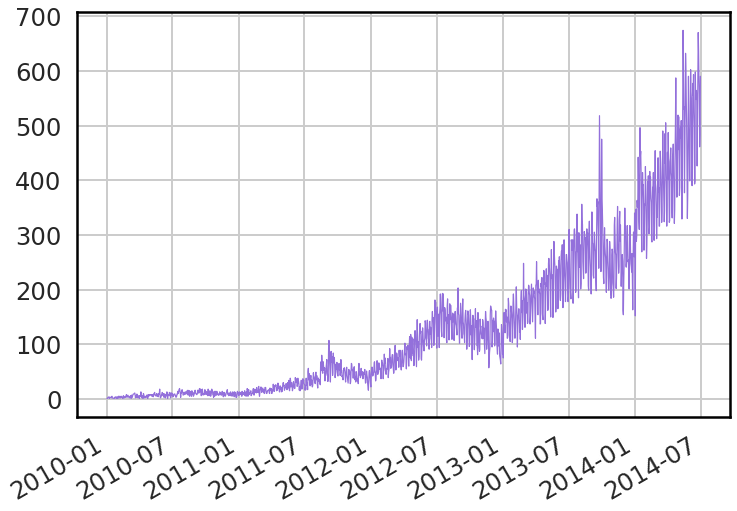

In [ ]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
df_train_users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='#9370db')

In [ ]:
df_train_users.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

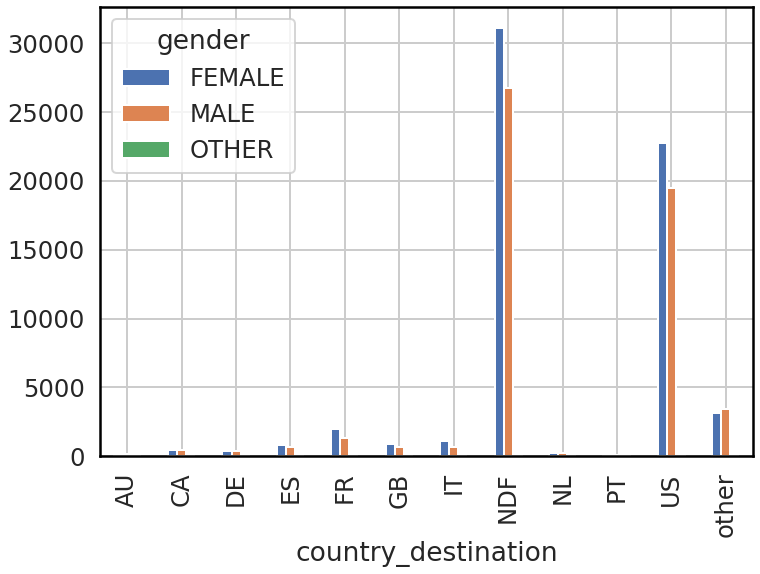

In [ ]:
CrosstabResult=pd.crosstab(index=df_train_users['country_destination'] ,columns=df_train_users['gender'])
CrosstabResult.plot.bar()

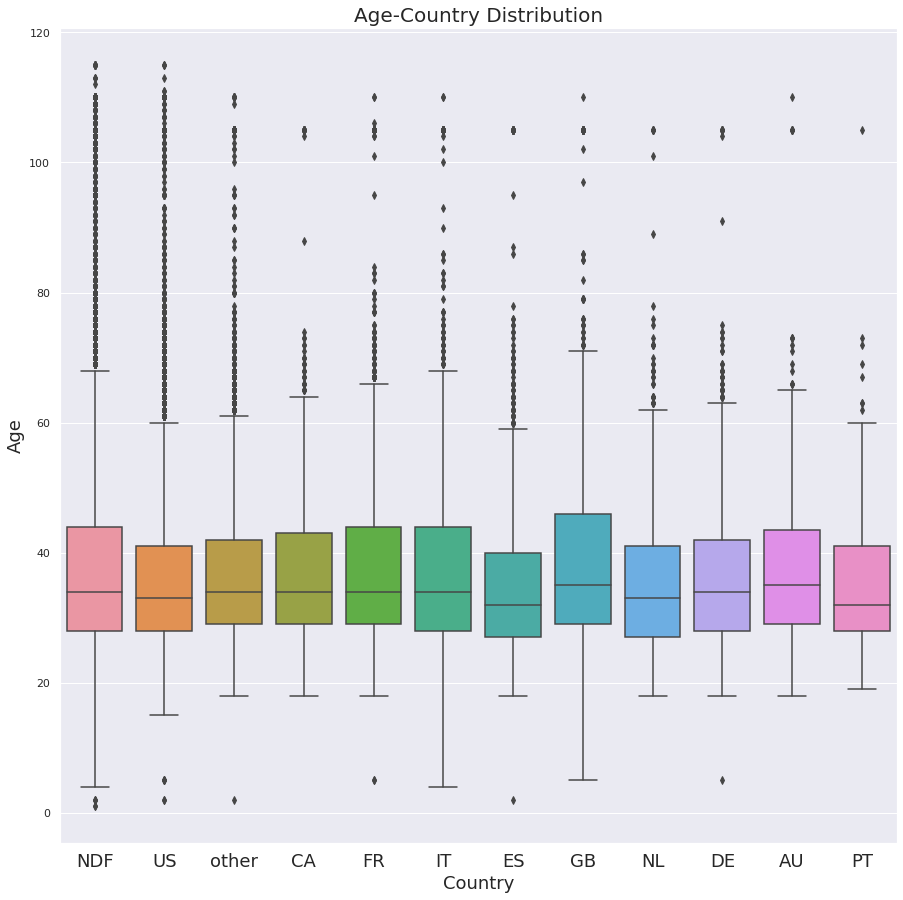

In [ ]:
plt.figure(figsize=(15,15))
sns.set(style='darkgrid')
#sns.set_context('talk')
df_train_users2 = df_train_users[df_train_users["age"]<120]
sns.boxplot(x=df_train_users2['country_destination'] , y=df_train_users2['age'])
plt.xlabel('Country', fontsize=18)
plt.ylabel('Age', fontsize=18)
plt.title('Age-Country Distribution', fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.show()

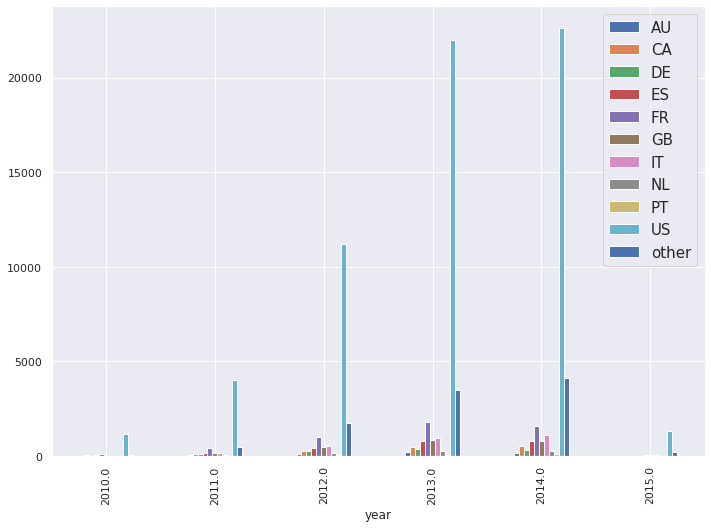

In [ ]:
df_train_users_dummy = df_train_users.copy()
df_train_users_dummy["date_first_booking"] = pd.to_datetime(df_train_users_dummy["date_first_booking"])

df_train_users_dummy["year"] = pd.to_datetime(df_train_users_dummy["date_first_booking"]).dt.year
df_train_users_dummy["month"] = pd.to_datetime(df_train_users_dummy["date_first_booking"]).dt.month
df_train_users_dummy["day"] = pd.to_datetime(df_train_users_dummy["date_first_booking"]).dt.dayofweek


CrosstabResult=pd.crosstab(columns=df_train_users_dummy['country_destination'] ,index=df_train_users_dummy['year'])
CrosstabResult.plot.bar()
plt.legend(fontsize=15)

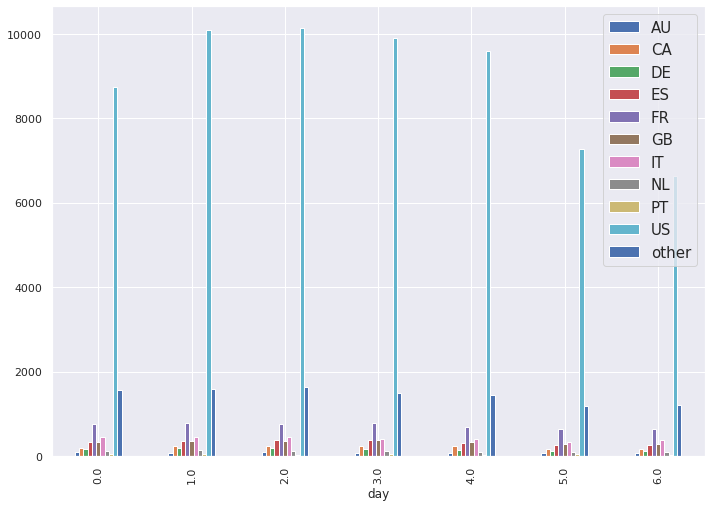

In [ ]:

CrosstabResult=pd.crosstab(columns=df_train_users_dummy['country_destination'] ,index=df_train_users_dummy['day'])
CrosstabResult.plot.bar()
plt.legend(fontsize=15)

## df_age_gender 

### Basic information and description of age_gender data

In [ ]:
df_age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_bucket               420 non-null    object 
 1   country_destination      420 non-null    object 
 2   gender                   420 non-null    object 
 3   population_in_thousands  420 non-null    float64
 4   year                     420 non-null    float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [ ]:
df_age_gender.describe().T

,count,mean,std,min,25%,50%,75%,max
population_in_thousands,420.0,1743.133333,2509.843202,0.0,396.5,1090.5,1968.0,11601.0
year,420.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0


### Unique value count

In [ ]:
df_age_gender.nunique().sort_values(ascending=False)

population_in_thousands    381
age_bucket                  21
country_destination         10
gender                       2
year                         1
dtype: int64

Looks like the data is for only one year. Therefore we can drop this variable.

In [ ]:
df_age_gender = df_age_gender.drop(columns = "year")
df_age_gender.head(2)

,age_bucket,country_destination,gender,population_in_thousands
0,100+,AU,male,1.0
1,95-99,AU,male,9.0


In [ ]:
df_age_gender.country_destination.value_counts().max()

42

## df_countries

### Basic information and description of countries data 

In [ ]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_destination            10 non-null     object 
 1   lat_destination                10 non-null     float64
 2   lng_destination                10 non-null     float64
 3   distance_km                    10 non-null     float64
 4   destination_km2                10 non-null     float64
 5   destination_language           10 non-null     object 
 6   language_levenshtein_distance  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 688.0+ bytes


In [ ]:
df_countries.describe()

,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance
count,10.000000,10.000000,10.000000,1.000000e+01,10.00000
mean,39.799398,-4.262446,7181.897800,2.973734e+06,50.49900
std,24.739112,63.700585,3941.141734,4.329619e+06,44.54169
min,-26.853388,-96.818146,0.000000,4.154300e+04,0.00000
25%,39.639090,-6.737559,7001.557600,2.580425e+05,0.00000
50%,44.053092,-0.139014,7603.632650,4.311960e+05,67.91500
75%,51.891219,9.163386,7842.357000,5.966865e+06,91.39500
max,62.393303,133.275160,15297.744000,9.984670e+06,95.45000


### Unique value count

In [ ]:
df_countries.nunique()

country_destination              10
lat_destination                  10
lng_destination                  10
distance_km                      10
destination_km2                  10
destination_language              7
language_levenshtein_distance     7
dtype: int64

## df_sessions

### Basic information and description of sessions data

In [ ]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [ ]:
df_sessions.describe().T

,count,mean,std,min,25%,50%,75%,max
secs_elapsed,10431706.0,19405.810751,88884.243208,0.0,229.0,1147.0,8444.0,1799977.0


In [ ]:
df_sessions.head(2)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0


### Unique value count

In [ ]:
df_sessions.nunique()

user_id          135483
action              359
action_type          10
action_detail       155
device_type          14
secs_elapsed     337661
dtype: int64

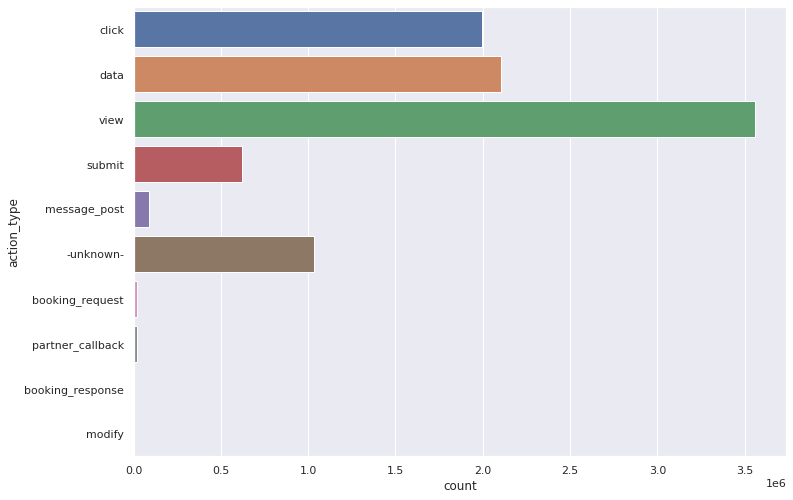

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = df_sessions, y = 'action_type')


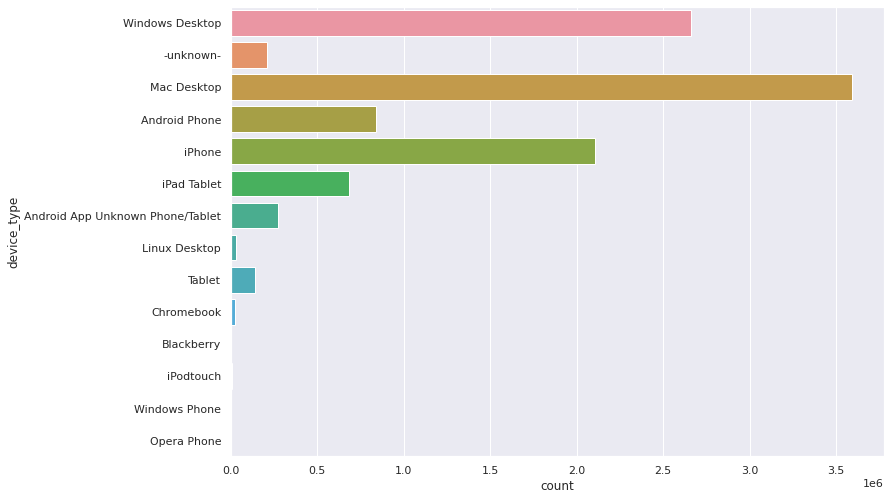

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = df_sessions, y = 'device_type')

## Observations

In [ ]:
df_test_users.set_index('id').index.difference(df_sessions.set_index('user_id').index)


Index(['04ceb28b8b', '07xltoeeb8', '0glhu4f57a', '0h003pwm32', '0if198phr6',
       '0ifwzowfdn', '0ixavub616', '0kdtuo4lky', '0m2k3yw95v', '0n6sgbei2t',
       ...
       'z3yxr00rmt', 'z4czoy46ie', 'z4ti5kwuy3', 'z8ksw3vr84', 'zf8g0s6x0e',
       'ziinfn1she', 'zmo0xwi510', 'zmxlayd386', 'zqjnjh22un', 'zyjy6ydp05'],
      dtype='object', length=428)

In [ ]:
   
visitors = pd.DataFrame({'id': [0, 1, 2, 3, 4]})
orders = pd.DataFrame({'id': [2,3,0, 1]})
nonorders=visitors.loc[~visitors.id.isin(orders.id),]
nonorders

,id
4,4


In [ ]:
df_train_users.loc[~df_train_users.id.isin(df_sessions.user_id),]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212945,h0slfsio2o,2014-06-30,1970-01-01 05:35:40.630024331,NaN,NaN,34.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF
212984,egeidqlx42,2014-06-30,1970-01-01 05:35:40.630035931,NaN,NaN,NaN,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,NDF
213082,v2mo2lxorn,2014-06-30,1970-01-01 05:35:40.630065823,NaN,NaN,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,NDF
213181,ii8kqtg7ca,2014-06-30,1970-01-01 05:35:40.630164823,NaN,NaN,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF


In [ ]:
df_sessions[df_sessions["user_id"] == "scojulukfu"]

,user_id,action,action_type,action_detail,device_type,secs_elapsed


In [ ]:
df_sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


# Feature Engineering

In [ ]:
df_age_gender.columns

Index(['age_bucket', 'country_destination', 'gender',
       'population_in_thousands'],
      dtype='object')

In [ ]:
df_age_gender.head(7)

,age_bucket,country_destination,gender,population_in_thousands
0,100+,AU,male,1.0
1,95-99,AU,male,9.0
2,90-94,AU,male,47.0
3,85-89,AU,male,118.0
4,80-84,AU,male,199.0
5,75-79,AU,male,298.0
6,70-74,AU,male,415.0


**df_age_gender**

1. For every age bin, get % of population choosing any particular destination country.
2. Create same ranged bin in df_train_users data and add these columns.


In [ ]:
df_age_gender

,age_bucket,country_destination,gender,population_in_thousands
0,100+,AU,male,1.0
1,95-99,AU,male,9.0
2,90-94,AU,male,47.0
3,85-89,AU,male,118.0
4,80-84,AU,male,199.0
...,...,...,...,...
415,95-99,US,male,115.0
416,90-94,US,male,541.0
417,15-19,US,female,10570.0
418,85-89,US,male,1441.0


In [ ]:
df_age_gender_updated = df_age_gender.copy()
df_age_gender_updated["percentage_population"] = df_age_gender_updated['population_in_thousands'] / df_age_gender_updated.groupby(['age_bucket', 'gender'])['population_in_thousands'].transform('sum')
#df_age_gender_updated[df_age_gender_updated["country_destination"]=="AU"]

In [ ]:
#df_age_gender_updated[(df_age_gender_updated["age_bucket"]=="20-24") & (df_age_gender_updated["gender"]=="male")]
df_age_gender_updated

,age_bucket,country_destination,gender,population_in_thousands,percentage_population
0,100+,AU,male,1.0,0.033333
1,95-99,AU,male,9.0,0.035433
2,90-94,AU,male,47.0,0.032662
3,85-89,AU,male,118.0,0.030164
4,80-84,AU,male,199.0,0.028449
...,...,...,...,...,...
415,95-99,US,male,115.0,0.452756
416,90-94,US,male,541.0,0.375956
417,15-19,US,female,10570.0,0.499126
418,85-89,US,male,1441.0,0.368354


**df_countries**

1. Get dist, area, lang_dist for every destination country and add these columns to df_train_users. (30 cols)

In [ ]:
df_countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [ ]:
#table1 = pd.pivot_table(df_countries, columns = 'country_destination',values = ['distance_km'], aggfunc=np.mean,index = None)
#table2 = pd.pivot_table(df_countries, columns = 'country_destination',values = ['destination_km2'], aggfunc=np.mean,index = None )
#table3 = pd.pivot_table(df_countries, columns = 'country_destination',values = ['language_levenshtein_distance'], aggfunc=np.mean,index = None )

In [ ]:
#table1.set_index(pd.Series([0]),inplace = True)
#table2.set_index(pd.Series([0]),inplace = True)
#table3.set_index(pd.Series([0]),inplace = True)

In [ ]:
#table1.columns = 'dis_' + table1.columns
#table2.columns = 'area_' + table2.columns
#table3.columns = 'lang_dis_' + table3.columns

In [ ]:
#df_countries_updated = pd.concat([table1,table2,table3],axis = 1,ignore_index=False)
#df_countries_updated.columns.name = None
#df_countries_updated

In [ ]:
#treating the age column
df_train_users.loc[df_train_users.age >= 120,'age'] = 120


#dropping date_first_booking column
df_train_users = df_train_users.drop(columns = "date_first_booking")

#combining the users data with countries data
#df_train_users_countries = pd.merge(df_train_users,df_countries_updated,how = 'cross')

**df_session**

For every user id in session data -- get

1. list of unique values action', 'action_type', 'action_detail', 'device_type','secs_elapsed'. 
2. Then get sum, mean, and count of secs_elapsed.
3. Mode for other cat columns. (or)
4. Vectorize other cat columns.
5. Finally concat with df_train_users.

In [ ]:
df_sessions.shape
df_sessions_unique=df_sessions.groupby(["user_id"],as_index=False).agg(lambda x :x.tolist())
print(df_sessions_unique.shape)
df_sessions_unique.head()

(135483, 6)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,00023iyk9l,"[index, dashboard, header_userpic, dashboard, ...","[view, view, data, view, partner_callback, mes...","[view_search_results, dashboard, header_userpi...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[20438.0, 787.0, 850.0, 934.0, nan, 129817.0, ..."
1,0010k6l0om,"[search_results, show, personalize, show, sear...","[click, view, data, nan, click, click, nan, da...","[view_search_results, p3, wishlist_content_upd...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,..."
2,001wyh0pz8,"[search, search, search, show, social_connecti...","[click, click, click, view, data, -unknown-, v...","[view_search_results, view_search_results, vie...","[Android App Unknown Phone/Tablet, Android App...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ..."
3,0028jgx1x1,"[show, reviews, show, search, show, search, re...","[view, data, view, click, view, click, data, s...","[user_profile, listing_reviews, p3, view_searc...","[-unknown-, -unknown-, -unknown-, -unknown-, -...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0..."
4,002qnbzfs5,"[social_connections, payment_methods, create, ...","[data, -unknown-, -unknown-, view, data, data,...","[user_social_connections, -unknown-, -unknown-...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782..."


#### Join with df_sessions

In [ ]:
import re
def total_sec(sec_list):
    
    """
    Function to calculate total time a particular user has spent in accessing the application.
        
    parameters: secs_elapsed 
    returns : total_secs_elapsed  
    """

    result=[]

    seconds=[str(i) for i in sec_list]
    seconds=[re.sub('nan','0',i) for i in seconds]
    seconds=[float(i) for i in seconds]
    result=sum(seconds)

    return result


from statistics import mean
def average_sec(sec_list):
    
    """
    Function to calculate mean time a particular user has spent in accessing the application.
        
    parameters: secs_elapsed 
    returns : average_secs_elapsed  
    """

    result=[]

    seconds=[str(i) for i in sec_list]
    seconds=[re.sub('nan','0',i) for i in seconds]
    seconds=[float(i) for i in seconds]

    result=mean(seconds)

    return result


def count_sec(sec_list):
  
    """
    Function to calculate number of events a particular user has spent in accessing the application.
        
    parameters: secs_elapsed 
    returns : number of sessions 
    """

    return len(sec_list)


In [ ]:
#summary statistics
df_sessions_unique["Total_seconds_elapsed"]=df_sessions_unique["secs_elapsed"].apply(total_sec)
df_sessions_unique["Mean_seconds_elapsed"]=df_sessions_unique["secs_elapsed"].apply(average_sec)
df_sessions_unique["Session_count"]=df_sessions_unique["secs_elapsed"].apply(count_sec)

In [ ]:
def unique_action(action):
    
    """
    Function to calculate unique actions per user. 

    parameters: action/device_* 
    returns : unique_action/device_*  
    """
   
    action = [str(i) for i in action]
    action = [re.sub('nan','',i) for i in action]
    
    action = ','.join(set(action))
    
    return action

In [ ]:
#get uniques
df_sessions_unique['unique_action'] = df_sessions_unique['action'].apply(unique_action)
df_sessions_unique['unique_action_type'] = df_sessions_unique['action_type'].apply(unique_action)
df_sessions_unique['unique_action_detail'] = df_sessions_unique['action_detail'].apply(unique_action)
df_sessions_unique['unique_device_type'] = df_sessions_unique['device_type'].apply(unique_action)

In [ ]:
print(df_sessions_unique.shape)
df_sessions_unique.head()

(135483, 13)


,user_id,action,action_type,action_detail,device_type,secs_elapsed,Total_seconds_elapsed,Mean_seconds_elapsed,Session_count,unique_action,unique_action_type,unique_action_detail,unique_device_type
0,00023iyk9l,"[index, dashboard, header_userpic, dashboard, ...","[view, view, data, view, partner_callback, mes...","[view_search_results, dashboard, header_userpi...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[20438.0, 787.0, 850.0, 934.0, nan, 129817.0, ...",867896.0,21697.400000,40,",similar_listings,dashboard,travel_plans_curre...",",partner_callback,booking_request,view,click,d...","p5,,wishlist_content_update,dashboard,your_tri...","Mac Desktop,iPhone"
1,0010k6l0om,"[search_results, show, personalize, show, sear...","[click, view, data, nan, click, click, nan, da...","[view_search_results, p3, wishlist_content_upd...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,...",586543.0,9310.206349,63,"dashboard,custom_recommended_destinations,pers...",",partner_callback,click,data,-unknown-,view",",wishlist_content_update,dashboard,change_trip...",Mac Desktop
2,001wyh0pz8,"[search, search, search, show, social_connecti...","[click, click, click, view, data, -unknown-, v...","[view_search_results, view_search_results, vie...","[Android App Unknown Phone/Tablet, Android App...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ...",282965.0,3144.055556,90,"active,campaigns,update,notifications,create,s...",",click,data,-unknown-,submit,view",",signup,update_user,user_social_connections,no...",Android App Unknown Phone/Tablet
3,0028jgx1x1,"[show, reviews, show, search, show, search, re...","[view, data, view, click, view, click, data, s...","[user_profile, listing_reviews, p3, view_searc...","[-unknown-, -unknown-, -unknown-, -unknown-, -...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0...",297010.0,9580.967742,31,"active,create,search,show,reviews","click,data,-unknown-,submit,view","listing_reviews,create_user,user_profile,p3,-u...","Android Phone,-unknown-"
4,002qnbzfs5,"[social_connections, payment_methods, create, ...","[data, -unknown-, -unknown-, view, data, data,...","[user_social_connections, -unknown-, -unknown-...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782...",6487080.0,8221.901141,789,",pay,confirm_email,push_notification_callback,...",",booking_request,click,data,-unknown-,message_...",",listing_reviews,user_profile,-unknown-,view_s...","iPhone,-unknown-"


In [ ]:
def count_unique(sec_list):
  
    """
    Function to calculate number of events a particular user has spent in accessing the application.
        
    parameters: secs_elapsed 
    returns : number of sessions 
    """

    return len(set(sec_list))

In [ ]:
df_sessions_unique["number_unique_actions_type"]=df_sessions_unique["action_type"].apply(count_unique)
df_sessions_unique["number_unique_action"]=df_sessions_unique["action"].apply(count_unique)
df_sessions_unique["number_unique_actions_detail"]=df_sessions_unique["action_detail"].apply(count_unique)
df_sessions_unique["number_unique_device_type"]=df_sessions_unique["device_type"].apply(count_unique)

In [ ]:
df_sessions_unique.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed,Total_seconds_elapsed,Mean_seconds_elapsed,Session_count,unique_action,unique_action_type,unique_action_detail,unique_device_type,number_unique_actions_type,number_unique_action,number_unique_actions_detail,number_unique_device_type
0,00023iyk9l,"[index, dashboard, header_userpic, dashboard, ...","[view, view, data, view, partner_callback, mes...","[view_search_results, dashboard, header_userpi...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[20438.0, 787.0, 850.0, 934.0, nan, 129817.0, ...",867896.0,21697.400000,40,",similar_listings,dashboard,travel_plans_curre...",",partner_callback,booking_request,view,click,d...","p5,,wishlist_content_update,dashboard,your_tri...","Mac Desktop,iPhone",7,14,14,2
1,0010k6l0om,"[search_results, show, personalize, show, sear...","[click, view, data, nan, click, click, nan, da...","[view_search_results, p3, wishlist_content_upd...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,...",586543.0,9310.206349,63,"dashboard,custom_recommended_destinations,pers...",",partner_callback,click,data,-unknown-,view",",wishlist_content_update,dashboard,change_trip...",Mac Desktop,6,11,9,1
2,001wyh0pz8,"[search, search, search, show, social_connecti...","[click, click, click, view, data, -unknown-, v...","[view_search_results, view_search_results, vie...","[Android App Unknown Phone/Tablet, Android App...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ...",282965.0,3144.055556,90,"active,campaigns,update,notifications,create,s...",",click,data,-unknown-,submit,view",",signup,update_user,user_social_connections,no...",Android App Unknown Phone/Tablet,6,10,10,1
3,0028jgx1x1,"[show, reviews, show, search, show, search, re...","[view, data, view, click, view, click, data, s...","[user_profile, listing_reviews, p3, view_searc...","[-unknown-, -unknown-, -unknown-, -unknown-, -...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0...",297010.0,9580.967742,31,"active,create,search,show,reviews","click,data,-unknown-,submit,view","listing_reviews,create_user,user_profile,p3,-u...","Android Phone,-unknown-",5,5,6,2
4,002qnbzfs5,"[social_connections, payment_methods, create, ...","[data, -unknown-, -unknown-, view, data, data,...","[user_social_connections, -unknown-, -unknown-...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782...",6487080.0,8221.901141,789,",pay,confirm_email,push_notification_callback,...",",booking_request,click,data,-unknown-,message_...",",listing_reviews,user_profile,-unknown-,view_s...","iPhone,-unknown-",8,26,23,2


In [ ]:
#merge data
df_train_users_countries_sesions = df_train_users.merge(df_sessions_unique, left_on = 'id', right_on = 'user_id', how = 'inner')
print(df_train_users_countries_sesions.shape)
df_train_users_countries_sesions.head(5)

(73815, 32)


,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,Mean_seconds_elapsed,Session_count,unique_action,unique_action_type,unique_action_detail,unique_device_type,number_unique_actions_type,number_unique_action,number_unique_actions_detail,number_unique_device_type
0,d1mm9tcy42,2014-01-01,1970-01-01 05:35:40.101000936,MALE,62.0,basic,0,en,sem-non-brand,google,...,26988.417323,127,",other_hosting_reviews_first,active,multi,pers...",",click,data,-unknown-,message_post,submit,view",",wishlist_content_update,change_trip_character...","Windows Desktop,-unknown-",7,17,10,2
1,yo8nz8bqcq,2014-01-01,1970-01-01 05:35:40.101001558,NaN,NaN,basic,0,en,direct,direct,...,23093.555556,9,"dashboard,personalize,header_userpic,create,co...",",click,data,submit,view","create_user,,wishlist_content_update,dashboard...",Mac Desktop,5,7,9,1
2,4grx6yxeby,2014-01-01,1970-01-01 05:35:40.101001639,NaN,NaN,basic,0,en,sem-brand,google,...,70965.250000,16,",active,multi,personalize,faq_experiment_ids,h...","booking_request,data,-unknown-,message_post,su...","create_user,p5,create_phone_numbers,wishlist_c...","Windows Desktop,-unknown-",6,13,8,2
3,ncf87guaf0,2014-01-01,1970-01-01 05:35:40.101002146,NaN,NaN,basic,0,en,direct,direct,...,24704.605263,152,"multi,search_results,ajax_refresh_subtotal,con...",",click,data,-unknown-,submit,view",",create_user,wishlist_content_update,change_tr...","Windows Desktop,Android Phone,-unknown-",6,19,12,3
4,4rvqpxoh3h,2014-01-01,1970-01-01 05:35:40.101002619,NaN,NaN,basic,25,en,direct,direct,...,319.375000,8,"active,campaigns,notifications,create,unavaila...",-unknown-,-unknown-,iPhone,1,7,1,1


In [ ]:
#df1 = df_train_users_countries_sesions.groupby('country_destination',as_index= False).agg('Mean_seconds_elapsed','Session_count'])
#df1

df1 = df_train_users_countries_sesions.groupby('country_destination').agg({'Mean_seconds_elapsed':'sum',
                         'Session_count':'mean' })

#df1['Seconds Elapsed per Session'] = df1['Mean_seconds_elapsed']/ df1['Session_count'] 
df1.reset_index(inplace = True)     
df1          

,country_destination,Mean_seconds_elapsed,Session_count
0,AU,4.351283e+06,79.039474
1,CA,1.208911e+07,89.313636
2,DE,7.475071e+06,93.564000
3,ES,2.063303e+07,95.012730
4,FR,4.287854e+07,101.853659
5,GB,2.456143e+07,88.961696
6,IT,3.065655e+07,103.933606
7,NDF,1.202200e+09,67.887258
8,NL,7.683799e+06,91.368421
9,PT,2.596088e+06,74.361446


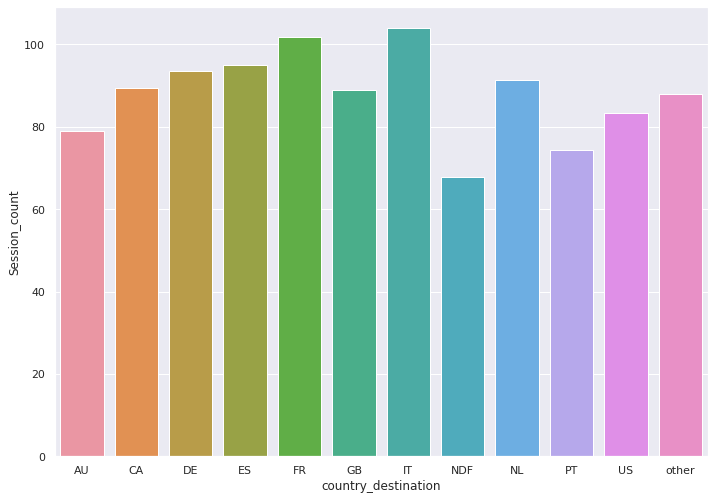

In [ ]:
sns.barplot(x = "country_destination", y = "Session_count", data = df1)


In [ ]:
df_train_users_countries_sesions.drop(["user_id","action","action_type","action_detail","device_type","secs_elapsed"],axis=1,inplace=True)

In [ ]:
df_train_users.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination'],
      dtype='object')

In [ ]:
df_train_users_countries_sesions.isna().sum()

id                                  0
date_account_created                0
timestamp_first_active              0
gender                          37788
age                             32248
signup_method                       0
signup_flow                         0
language                            0
affiliate_channel                   0
affiliate_provider                  0
first_affiliate_tracked           302
signup_app                          0
first_device_type                   0
first_browser                       0
country_destination                 0
Total_seconds_elapsed               0
Mean_seconds_elapsed                0
Session_count                       0
unique_action                       0
unique_action_type                  0
unique_action_detail                0
unique_device_type                  0
number_unique_actions_type          0
number_unique_action                0
number_unique_actions_detail        0
number_unique_device_type           0
dtype: int64

In [ ]:
print(df_train_users_countries_sesions.shape)
print(df_train_users_countries_sesions.columns)


(73815, 26)
Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination',
       'Total_seconds_elapsed', 'Mean_seconds_elapsed', 'Session_count',
       'unique_action', 'unique_action_type', 'unique_action_detail',
       'unique_device_type', 'number_unique_actions_type',
       'number_unique_action', 'number_unique_actions_detail',
       'number_unique_device_type'],
      dtype='object')


In [ ]:
df_train_users_countries_sesions_target = df_train_users_countries_sesions['country_destination']
df_train_users_countries_sesions = df_train_users_countries_sesions.drop(['country_destination'], axis = 1)
df_train_users_countries_sesions.shape


(73815, 25)

In [ ]:
#backup
train=df_train_users_countries_sesions 

#dropping id variable
train.drop("id",axis=1,inplace=True)

### Train-Val split

In [ ]:
#75% train split and 25% val split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, df_train_users_countries_sesions_target, test_size = 0.25, random_state = 42)

In [ ]:
print('X_train : ',X_train.shape)
print('y_train : ',y_train.shape)
print('X_val : ',X_val.shape)
print('y_val : ',y_val.shape)

X_train :  (55361, 24)
y_train :  (55361,)
X_val :  (18454, 24)
y_val :  (18454,)


In [ ]:
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_val.reset_index(drop = True, inplace = True)
y_val.reset_index(drop = True, inplace = True)

In [ ]:
X_train.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,Mean_seconds_elapsed,Session_count,unique_action,unique_action_type,unique_action_detail,unique_device_type,number_unique_actions_type,number_unique_action,number_unique_actions_detail,number_unique_device_type
0,2014-06-29,1970-01-01 05:35:40.629160406,NaN,NaN,basic,0,en,direct,direct,linked,...,9260.869565,23,",personalize,header_userpic,similar_listings_v...",",view,click,data,submit,message_post",",wishlist_content_update,change_trip_character...",Mac Desktop,6,11,9,1
1,2014-05-10,1970-01-01 05:35:40.510033806,FEMALE,21.0,facebook,25,en,direct,direct,untracked,...,9323.764706,17,"active,apply_code,update,campaigns,referrer_st...",",data,-unknown-,submit,view","update_user,,user_listings,user_profile,-unkno...","iPhone,-unknown-",5,9,7,2
2,2014-02-28,1970-01-01 05:35:40.228161206,NaN,NaN,basic,0,en,direct,direct,linked,...,15003.888889,18,"ajax_get_referrals_amt,dashboard,personalize,h...",",click,data,-unknown-,submit,view","create_user,,wishlist_content_update,dashboard...","Mac Desktop,iPhone",6,11,10,2
3,2014-03-31,1970-01-01 05:35:40.331213506,NaN,NaN,basic,0,en,direct,direct,untracked,...,0.000000,1,manage_listing,view,manage_listing,Mac Desktop,1,1,1,1
4,2014-05-19,1970-01-01 05:35:40.519024944,MALE,26.0,facebook,0,en,direct,direct,untracked,...,7135.535714,28,"ajax_get_referrals_amt,ajax_referral_banner_ty...",",click,data,-unknown-,submit,view",",wishlist_content_update,login,change_trip_cha...",Mac Desktop,6,10,10,1


### Vectorize text data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_action = TfidfVectorizer(min_df=10,max_features=10000)
tfidf_vect_action.fit(X_train['unique_action'].values)
X_train_action_tfidf = tfidf_vect_action.transform(X_train['unique_action'].values)
X_val_action_tfidf = tfidf_vect_action.transform(X_val['unique_action'].values)


In [ ]:
print(X_train_action_tfidf.shape)
print(X_val_action_tfidf.shape)

(55361, 250)
(18454, 250)


In [ ]:
print('Top 30 Feature Names for Action : ',tfidf_vect_action.get_feature_names()[:30])

Top 30 Feature Names for Action :  ['10', '11', '12', '15', 'about_us', 'account', 'active', 'add_guests', 'add_note', 'agree_terms_check', 'agree_terms_uncheck', 'airbnb_picks', 'ajax_check_dates', 'ajax_get_referrals_amt', 'ajax_get_results', 'ajax_google_translate', 'ajax_google_translate_description', 'ajax_google_translate_reviews', 'ajax_image_upload', 'ajax_ldp', 'ajax_lwlb_contact', 'ajax_payout_edit', 'ajax_payout_options_by_country', 'ajax_photo_widget_form_iframe', 'ajax_price_and_availability', 'ajax_referral_banner_experiment_type', 'ajax_referral_banner_type', 'ajax_refresh_subtotal', 'ajax_send_message', 'ajax_statsd']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_vect_action_type = TfidfVectorizer(min_df=10,max_features=10000)

tfidf_vect_action_type.fit(X_train['unique_action_type'].values)
X_train_action_type_tfidf = tfidf_vect_action_type.transform(X_train['unique_action_type'].values)
X_val_action_type_tfidf = tfidf_vect_action_type.transform(X_val['unique_action_type'].values)

In [ ]:
print('Top 30 Feature Names for Action Type : ',tfidf_vect_action_type.get_feature_names()[:30])

Top 30 Feature Names for Action Type :  ['booking_request', 'click', 'data', 'message_post', 'partner_callback', 'submit', 'unknown', 'view']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_vect_action_detail = TfidfVectorizer(min_df=10,max_features=10000,)

tfidf_vect_action_detail.fit(X_train['unique_action_detail'].values)

X_train_action_detail_tfidf = tfidf_vect_action_detail.transform(X_train['unique_action_detail'].values)
X_val_action_detail_tfidf = tfidf_vect_action_detail.transform(X_val['unique_action_detail'].values)

In [ ]:
#X_train_action_detail_tfidf_df=pd.DataFrame(X_train_action_detail_tfidf)
#X_val_action_detail_tfidf_df=pd.DataFrame(X_val_action_detail_tfidf)

In [ ]:
print('Top 30 Feature Names for Action Detail : ',tfidf_vect_action_detail.get_feature_names()[:30])

Top 30 Feature Names for Action Detail :  ['account_notification_settings', 'account_payout_preferences', 'account_privacy_settings', 'account_transaction_history', 'admin_templates', 'airbnb_picks_wishlists', 'alteration_field', 'alteration_request', 'apply_coupon', 'apply_coupon_click', 'apply_coupon_click_success', 'apply_coupon_error', 'at_checkpoint', 'book_it', 'calculate_worth', 'cancellation_policies', 'cancellation_policy_click', 'change_availability', 'change_contact_host_dates', 'change_or_alter', 'change_password', 'change_trip_characteristics', 'complete_booking', 'confirm_email', 'confirm_email_link', 'contact_host', 'coupon_code_click', 'coupon_field_focus', 'create_listing', 'create_phone_numbers']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect_unique_device_type = CountVectorizer()
vect_unique_device_type.fit(X_train['unique_device_type'].values)
X_train_unique_device_type_bow = vect_unique_device_type.transform(X_train['unique_device_type'].values)
X_val_unique_device_type_bow = vect_unique_device_type.transform(X_val['unique_device_type'].values)



In [ ]:
#Now Combining the above created features and removing the unvectorized features
X_train_vec=X_train.drop(["unique_device_type","unique_action_detail","unique_action","unique_action_type"],axis=1)
X_val_vec=X_val.drop(["unique_device_type","unique_action_detail","unique_action","unique_action_type"],axis=1)


In [ ]:
X_train_action_tfidf_df=pd.DataFrame(X_train_action_tfidf.toarray(), columns=tfidf_vect_action.get_feature_names())
X_val_action_tfidf_df=pd.DataFrame(X_val_action_tfidf.toarray(), columns=tfidf_vect_action.get_feature_names())
print(X_train_action_tfidf_df.shape)

X_train_action_type_tfidf_df=pd.DataFrame(X_train_action_type_tfidf.toarray(), columns=tfidf_vect_action_type.get_feature_names())
X_val_action_type_tfidf_df=pd.DataFrame(X_val_action_type_tfidf.toarray(), columns=tfidf_vect_action_type.get_feature_names())
print(X_train_action_type_tfidf_df.shape)

X_train_action_detail_tfidf_df=pd.DataFrame(X_train_action_detail_tfidf.toarray(), columns=tfidf_vect_action_detail.get_feature_names())
X_val_action_detail_tfidf_df=pd.DataFrame(X_val_action_detail_tfidf.toarray(), columns=tfidf_vect_action_detail.get_feature_names())
print(X_train_action_detail_tfidf_df.shape)

X_train_unique_device_type_bow_df=pd.DataFrame(X_train_unique_device_type_bow.toarray(), columns=vect_unique_device_type.get_feature_names())
X_val_unique_device_type_bow_df=pd.DataFrame(X_val_unique_device_type_bow.toarray(), columns=vect_unique_device_type.get_feature_names())
print(X_train_unique_device_type_bow_df.shape)


(55361, 250)
(55361, 8)
(55361, 120)
(55361, 15)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X_train_action_tfidf_df.isna().sum().sum())
print(X_train_action_type_tfidf_df.isna().sum().sum())
print(X_train_action_detail_tfidf_df.isna().sum().sum())
print(X_train_unique_device_type_bow_df.isna().sum().sum())

0
0
0
0


In [ ]:
X_train_vec_merged = pd.concat([X_train_vec.reset_index(drop = True),X_train_action_tfidf_df,X_train_action_type_tfidf_df,X_train_action_detail_tfidf_df,X_train_unique_device_type_bow_df],axis=1)
print(X_train_vec_merged.shape)

X_val_vec_merged=pd.concat([X_val_vec.reset_index(drop = True),X_val_action_tfidf_df,X_val_action_type_tfidf_df,X_val_action_detail_tfidf_df,X_val_unique_device_type_bow_df],axis=1)
print(X_val_vec_merged.shape)

(55361, 413)
(18454, 413)


In [ ]:
X_train_vec_merged.isnull().sum().sort_values(ascending=False)

gender                     28377
age                        24154
first_affiliate_tracked      237
date_account_created           0
data                           0
                           ...  
kba                            0
jumio_token                    0
jumio_redirect                 0
jumio                          0
windows                        0
Length: 413, dtype: int64

In [ ]:
X_val_vec_merged.isnull().sum().sort_values(ascending=False)

gender                     9411
age                        8094
first_affiliate_tracked      65
date_account_created          0
data                          0
                           ... 
kba                           0
jumio_token                   0
jumio_redirect                0
jumio                         0
windows                       0
Length: 413, dtype: int64

In [ ]:
#make year, month and day columns out of timestamp columns

#***********************************************Training Data***********************************************

X_train_vec_merged["first_active_year"] = X_train_vec_merged["timestamp_first_active"].dt.year.astype(str)
X_train_vec_merged["first_active_month"] = X_train_vec_merged["timestamp_first_active"].dt.month.astype(str)
X_train_vec_merged["first_active_day"] = X_train_vec_merged["timestamp_first_active"].dt.dayofweek.astype(str)

X_train_vec_merged["account_created_year"] = X_train_vec_merged["date_account_created"].dt.year.astype(str)
X_train_vec_merged["account_created_month"] = X_train_vec_merged["date_account_created"].dt.month.astype(str)
X_train_vec_merged["account_created_day"] = X_train_vec_merged["date_account_created"].dt.dayofweek.astype(str)

#***********************************************Validating Data***********************************************


X_val_vec_merged["first_active_year"] = X_val_vec_merged["timestamp_first_active"].dt.year.astype(str)
X_val_vec_merged["first_active_month"] = X_val_vec_merged["timestamp_first_active"].dt.month.astype(str)
X_val_vec_merged["first_active_day"] = X_val_vec_merged["timestamp_first_active"].dt.dayofweek.astype(str)

X_val_vec_merged["account_created_year"] = X_val_vec_merged["date_account_created"].dt.year.astype(str)
X_val_vec_merged["account_created_month"] = X_val_vec_merged["date_account_created"].dt.month.astype(str)
X_val_vec_merged["account_created_day"] = X_val_vec_merged["date_account_created"].dt.dayofweek.astype(str)


In [ ]:
#drop columns used above for creating year, month and day

X_train_vec_merged = X_train_vec_merged.drop(columns = ["timestamp_first_active", "date_account_created"])
X_val_vec_merged = X_val_vec_merged.drop(columns = ["timestamp_first_active", "date_account_created"])


In [ ]:
X_train_vec_merged.nunique().sort_values(ascending = True)[:40]

account_created_year           1
first_active_day               1
first_active_month             1
first_active_year              1
opera                          2
app                            2
blackberry                     2
chromebook                     2
ipad                           2
iphone                         2
ipodtouch                      2
linux                          2
mac                            2
gender                         3
phone                          3
tablet                         3
unknown                        3
windows                        3
signup_method                  3
android                        3
signup_app                     4
desktop                        4
number_unique_device_type      6
account_created_month          6
account_created_day            7
first_affiliate_tracked        7
signup_flow                    7
affiliate_channel              8
number_unique_actions_type     9
first_device_type              9
new_sessio

In [ ]:
X_val_vec_merged.nunique().sort_values(ascending = True)[:40]

onenight                                   1
account_created_year                       1
first_active_day                           1
first_active_month                         1
first_active_year                          1
opera                                      1
ipodtouch                                  2
linux                                      2
mac                                        2
chromebook                                 2
blackberry                                 2
iphone                                     2
new_session                                2
app                                        2
create_ach                                 2
ipad                                       2
android                                    3
gender                                     3
create_paypal                              3
alteration_request                         3
apply_coupon_click_success                 3
apply_coupon_click_success                 3
signup_met

In [ ]:
#drop cols
X_train_vec_merged = X_train_vec_merged.drop(columns = ["account_created_year", "first_active_day", "first_active_month", "first_active_year"])
X_val_vec_merged = X_val_vec_merged.drop(columns = ["account_created_year", "first_active_day", "first_active_month", "first_active_year"])


In [ ]:
X_train_vec_merged.isna().sum().sort_values(ascending = False)[:7]

gender                     28377
age                        24154
first_affiliate_tracked      237
account_created_month          0
message_post                   0
airbnb_picks_wishlists         0
admin_templates                0
dtype: int64

## Encoding

In [ ]:
X_train_vec_merged.shape, X_val_vec_merged.shape

((55361, 413), (18454, 413))

In [ ]:
(X_train_vec_merged.dtypes == "O").sort_values(ascending = False)[:15]

gender                      True
first_affiliate_tracked     True
account_created_month       True
first_browser               True
first_device_type           True
signup_app                  True
account_created_day         True
affiliate_provider          True
signup_method               True
affiliate_channel           True
language                    True
submit                     False
alteration_request         False
alteration_field           False
airbnb_picks_wishlists     False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


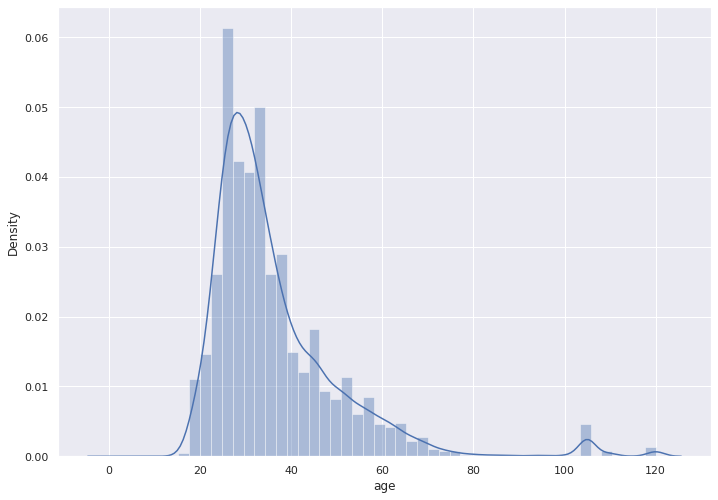

In [ ]:
sns.distplot(X_train_vec_merged.age, label = 'age distribution')

### One - Hot encoding 

For Logistic Regression --- NaNs are dropped


In [ ]:
training_data = X_train_vec_merged.copy()
validating_data = X_val_vec_merged.copy()

In [ ]:
print(training_data.shape)
training_data_dropped_NA=training_data.dropna()
print(training_data_dropped_NA.shape)

print("***********************************************************************")

print(validating_data.shape)
validating_data_dropped_NA=validating_data.dropna()
print(validating_data_dropped_NA.shape)


(55361, 413)
(25819, 413)
***********************************************************************
(18454, 413)
(8610, 413)


In [ ]:
#getting the target column for one hot encoded

y_train_one_hot = y_train[training_data_dropped_NA.index]
y_val_one_hot = y_val[validating_data_dropped_NA.index]
print(y_train_one_hot.shape,y_val_one_hot.shape)

(25819,) (8610,)


In [ ]:
#Label encoding the target variable in one hot

label_encoder_target_one_hot = LabelEncoder()
encoded_y_train_one_hot = label_encoder_target_one_hot.fit_transform(y_train_one_hot)
encoded_y_val_one_hot=label_encoder_target_one_hot.transform(y_val_one_hot)

***Please take above 2 series for target (in case of one-hot encoded)***

In [ ]:
training_data_dropped_NA = training_data_dropped_NA.reset_index(drop=True)
validating_data_dropped_NA = validating_data_dropped_NA.reset_index(drop=True)


In [ ]:

#create a list of variables to encode and impute
Cat_to_encode = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 
                 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', "account_created_month", "account_created_day"]
#Cat_toimpute = ["booking_year_encoded", "booking_month_encoded", "booking_day_encoded", "gender", "first_affiliate_tracked"]
num_toimpute = ["age"]


#### For training and validating set

In [ ]:
training_data_encoded = training_data_dropped_NA.copy()
validating_data_encoded = validating_data_dropped_NA.copy()

for cat in Cat_to_encode:
  X_training = training_data_encoded[cat].values.reshape(-1, 1)
  X_validating = validating_data_encoded[cat].values.reshape(-1, 1)

  encoder = OneHotEncoder(handle_unknown='ignore')
  y_training = encoder.fit_transform(X_training).toarray()
  y_validating = encoder.transform(X_validating).toarray()

  y_training_df = pd.DataFrame(y_training, columns = encoder.get_feature_names_out([cat]))
  y_validating_df = pd.DataFrame(y_validating, columns = encoder.get_feature_names_out([cat]))

  training_data_encoded = pd.concat([training_data_encoded, y_training_df], axis = 1)
  validating_data_encoded = pd.concat([validating_data_encoded, y_validating_df], axis = 1)


In [ ]:
#drop the columns who are now encoded --- training
print(training_data_encoded.shape)
training_data_one_hot_encoded = training_data_encoded.drop(columns=Cat_to_encode)
print(training_data_one_hot_encoded.shape)

print("***********************************************************************")

#drop the columns who are now encoded --- validating
print(validating_data_encoded.shape)
validating_data_one_hot_encoded = validating_data_encoded.drop(columns=Cat_to_encode)
print(validating_data_one_hot_encoded.shape)

(25819, 526)
(25819, 515)
***********************************************************************
(8610, 526)
(8610, 515)


In [ ]:
training_data_one_hot_encoded

,age,signup_flow,Total_seconds_elapsed,Mean_seconds_elapsed,Session_count,number_unique_actions_type,number_unique_action,number_unique_actions_detail,number_unique_device_type,10,...,account_created_month_4,account_created_month_5,account_created_month_6,account_created_day_0,account_created_day_1,account_created_day_2,account_created_day_3,account_created_day_4,account_created_day_5,account_created_day_6
0,21.0,25,158504.0,9323.764706,17,5,9,7,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,26.0,0,199795.0,7135.535714,28,6,10,10,1,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51.0,25,1728834.0,246976.285714,7,4,5,5,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,33.0,0,19802.0,2200.222222,9,3,4,4,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,23.0,0,142106.0,9473.733333,15,5,9,9,2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25814,30.0,0,1337817.0,27302.387755,49,8,28,18,2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25815,31.0,0,3235.0,808.750000,4,3,3,3,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25816,42.0,0,1921821.0,46873.682927,41,8,18,18,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25817,60.0,0,995.0,331.666667,3,2,2,2,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
validating_data_one_hot_encoded

,age,signup_flow,Total_seconds_elapsed,Mean_seconds_elapsed,Session_count,number_unique_actions_type,number_unique_action,number_unique_actions_detail,number_unique_device_type,10,...,account_created_month_4,account_created_month_5,account_created_month_6,account_created_day_0,account_created_day_1,account_created_day_2,account_created_day_3,account_created_day_4,account_created_day_5,account_created_day_6
0,26.0,0,122326.0,11120.545455,11,4,5,5,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,30.0,0,891197.0,44559.850000,20,4,8,8,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26.0,0,188149.0,37629.800000,5,4,4,4,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,44.0,0,723086.0,14178.156863,51,6,8,7,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,42.0,0,644968.0,10402.709677,62,7,15,15,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,42.0,0,3099674.0,24028.480620,129,8,34,24,1,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8606,27.0,0,7329738.0,37588.400000,195,8,30,21,2,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8607,26.0,0,2605711.0,14721.531073,177,7,39,32,2,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8608,41.0,0,164709.0,10294.312500,16,6,12,12,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
print(y_train_one_hot.shape,y_val_one_hot.shape)

(25819,) (8610,)


***Please take above 2 dataframe for X (in case of one-hot encoded)***

In [ ]:
#No null vals
print(training_data_one_hot_encoded.isna().sum().sort_values(ascending = False)[:5])
print("***********************************************************************")
print(validating_data_one_hot_encoded.isna().sum().sort_values(ascending = False)[:5])

age             0
your_trips      0
set_password    0
send_message    0
reservations    0
dtype: int64
***********************************************************************
age             0
your_trips      0
set_password    0
send_message    0
reservations    0
dtype: int64


In [ ]:
pd.set_option('display.max_columns', 500)

### Ordinal - Encoding

For tree-based models --- NANs will be made -1 for the models to train

In [ ]:
training_data_label_encoded=training_data.copy()
validating_data_label_encoded=validating_data.copy()
#training_data_label_encoded

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
for cat in Cat_to_encode:
    encoder = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)
    original_column=training_data_label_encoded[cat]
    column_mask=training_data_label_encoded[cat].isnull()
    training_data_label_encoded[cat+"_lab_encoded"] = encoder.fit_transform(training_data_label_encoded[cat].values.reshape(-1,1).astype(str))
    training_data_label_encoded[cat+"_lab_encoded"] = training_data_label_encoded[cat+"_lab_encoded"].where(~column_mask,original_column)

    #######################################Label Encoding for Valdiation##############################################
    #######################################Label Encoding for Valdiation##############################################
    original_column_val=validating_data_label_encoded[cat]
    column_mask_val=validating_data_label_encoded[cat].isnull()
    validating_data_label_encoded[cat+"_lab_encoded"] = encoder.transform(validating_data_label_encoded[cat].values.reshape(-1,1).astype(str))
    validating_data_label_encoded[cat+"_lab_encoded"] = validating_data_label_encoded[cat+"_lab_encoded"].where(~column_mask_val,original_column_val)


In [ ]:
training_data_label_encoded

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,Total_seconds_elapsed,Mean_seconds_elapsed,Session_count,number_unique_actions_type,number_unique_action,number_unique_actions_detail,number_unique_device_type,10,11,12,15,about_us,account,active,add_guests,add_note,agree_terms_check,agree_terms_uncheck,airbnb_picks,ajax_check_dates,ajax_get_referrals_amt,ajax_get_results,ajax_google_translate,ajax_google_translate_description,ajax_google_translate_reviews,ajax_image_upload,ajax_ldp,ajax_lwlb_contact,ajax_payout_edit,ajax_payout_options_by_country,ajax_photo_widget_form_iframe,ajax_price_and_availability,ajax_referral_banner_experiment_type,ajax_referral_banner_type,ajax_refresh_subtotal,ajax_send_message,ajax_statsd,ajax_worth,apply_code,apply_coupon_click,apply_coupon_click_success,apply_coupon_error,apply_coupon_error_type,apply_reservation,ask_question,at_checkpoint,authenticate,authorize,available,become_user,calendar_tab_inner2,callback,campaigns,cancel,cancellation_policies,cancellation_policy_click,change,change_availability,change_currency,change_password,check,clear_reservation,click,clickthrough,collections,complete,complete_redirect,complete_status,concierge,confirm_email,connect,contact_new,countries,country_options,coupon_code_click,coupon_field_focus,create,create_ach,create_multiple,create_paypal,currencies,dashboard,decision_tree,delete,department,departments,destroy,detect_fb_session,domains,edit,edit_verification,email_itinerary_colorbox,email_share,email_wishlist,endpoint_error,facebook_auto_login,faq,faq_category,faq_experiment_ids,forgot_password,founders,friends,friends_new,glob,guarantee,guest_booked_elsewhere,handle_vanity_url,header_userpic,home_safety_landing,hospitality,hospitality_standards,host_2013,host_summary,hosting_social_proof,how_it_works,identity,image_order,impressions,index,issue,itinerary,jumio,jumio_redirect,jumio_token,kba,kba_update,languages_multiselect,life,listing,listings,localization_settings,login,login_modal,lookup,manage_listing,message_to_host_change,message_to_host_focus,mobile_landing_page,mobile_oauth_callback,multi,multi_message,multi_message_attributes,my,my_listings,new,new_session,notifications,office_location,onenight,open_graph_setting,other_hosting_reviews,other_hosting_reviews_first,overview,p4_refund_policy_terms,p4_terms,patch,pay,payment_instruments,payment_methods,payoneer_account_redirect,payoneer_signup_complete,payout_preferences,payout_update,pending,pending_tickets,personalize,phone_number_widget,phone_verification_call_taking_too_long,phone_verification_error,phone_verification_modal,phone_verification_number_submitted_for_call,phone_verification_number_submitted_for_sms,phone_verification_number_sucessfully_submitted,phone_verification_phone_number_removed,phone_verification_success,photography,place_worth,popular,popular_listing,populate_from_facebook,populate_help_dropdown,position,press_release,privacy,profile_pic,push_notification_callback,qt2,qt_reply_v2,qt_with,rate,read_policy_click,receipt,recent_reservations,recommend,recommendations,recommended_listings,references,referrer_status,relationship,remove_dashboard_alert,reputation,request_new_confirm_email,request_photography,requested,requirements,review_page,reviews,reviews_new,salute,search,search_results,set_password,set_user,settings,show,show_code,show_personalize,signature,signed_out_modal,signup_login,signup_modal,similar_listings,similar_listings_v2,slideshow,social,social_connections,spoken_languages,status,submit_contact,supported,tell_a_friend,terms,terms_and_conditions,this_hosting_reviews,toggle_archived_thread,toggle_starred_thread,top_destinations,tos_confirm,track_page_view,transaction_history,transaction_history_paginated,travel_plans_current,travel_plans_previous,trust,unavailabilities,unread,update,update_cached,update_friends_display,update_hide_from_search_engines,update_notific

In [ ]:
training_data_label_encoded.isna().sum()

gender                               28377
age                                  24154
signup_method                            0
signup_flow                              0
language                                 0
                                     ...  
signup_app_lab_encoded                   0
first_device_type_lab_encoded            0
first_browser_lab_encoded                0
account_created_month_lab_encoded        0
account_created_day_lab_encoded          0
Length: 424, dtype: int64

In [ ]:
#change NANs to -1
print("*****************Before Replacement*************************")
print(training_data_label_encoded.isna().sum())

training_data_label_encoded = training_data_label_encoded.fillna(-1)
training_data_label_encoded.replace(to_replace='nan', value=np.nan)
training_data_label_encoded.replace(to_replace='NaN', value=-1, regex=True)

############################ For Validation Data###############################

validating_data_label_encoded = validating_data_label_encoded.fillna(-1)
validating_data_label_encoded.replace(to_replace='nan', value=np.nan)
validating_data_label_encoded.replace(to_replace='NaN', value=-1, regex=True)

print("*****************After Replacement*************************")
print(training_data_label_encoded.isna().sum())
print(validating_data_label_encoded.isna().sum())

*****************Before Replacement*************************
gender                               28377
age                                  24154
signup_method                            0
signup_flow                              0
language                                 0
                                     ...  
signup_app_lab_encoded                   0
first_device_type_lab_encoded            0
first_browser_lab_encoded                0
account_created_month_lab_encoded        0
account_created_day_lab_encoded          0
Length: 424, dtype: int64
*****************After Replacement*************************
gender                               0
age                                  0
signup_method                        0
signup_flow                          0
language                             0
                                    ..
signup_app_lab_encoded               0
first_device_type_lab_encoded        0
first_browser_lab_encoded            0
account_created_month_lab_enc

In [ ]:
#Label encoding the target variable
label_encoder_target = LabelEncoder()
encoded_y_train = label_encoder_target.fit_transform(y_train)
encoded_y_val=label_encoder_target.transform(y_val)

In [ ]:
np.unique(encoded_y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
label_encoder_target.classes_

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US',
       'other'], dtype=object)

In [ ]:
encoded_y_train.shape, encoded_y_val.shape

((55361,), (18454,))

In [ ]:
training_data_label_encoded = training_data_label_encoded.drop(columns = Cat_to_encode)
validating_data_label_encoded = validating_data_label_encoded.drop(columns = Cat_to_encode)

In [ ]:
print(training_data_label_encoded.shape)
print(validating_data_label_encoded .shape)

(55361, 413)
(18454, 413)


# Modeling

## Logistic Regression

### Standard-Scaling

In [ ]:
numeric_cols=['age','signup_flow','Total_seconds_elapsed','Mean_seconds_elapsed','Session_count','number_unique_actions_type','number_unique_action',
 'number_unique_actions_detail','number_unique_device_type']

scaler_ = StandardScaler()
scaled_data_train = scaler_.fit_transform(training_data_one_hot_encoded[numeric_cols])
scaled_data_val = scaler_.transform(validating_data_one_hot_encoded[numeric_cols])

df_not_to_scale_train = training_data_one_hot_encoded.drop(numeric_cols, axis=1)
df_not_to_scale_val = validating_data_one_hot_encoded.drop(numeric_cols, axis=1)

scaled_df_train = pd.DataFrame(data=scaled_data_train, columns=numeric_cols)
scaled_df_val = pd.DataFrame(data=scaled_data_val, columns=numeric_cols)

X_train = pd.concat([scaled_df_train,df_not_to_scale_train], axis=1)
y_train = encoded_y_train_one_hot

X_val = pd.concat([scaled_df_val,df_not_to_scale_val], axis=1)
y_val = encoded_y_val_one_hot

In [ ]:
lr=LogisticRegression(multi_class="multinomial")
lr.fit(X_train, y_train)

print('Initial LR Model Accuracy on training set:', lr.score(X_train, y_train))
print('Initial LR Model Accuracy on validating set:', lr.score(X_val, y_val))

preds_train = pd.DataFrame(lr.predict_proba(X_train), columns=lr.classes_)
c_train = preds_train.to_numpy()
d_train = pd.get_dummies(y_train).to_numpy()
ndcg_score_train = ndcg_score(c_train, d_train.astype(float), k=5)

print('Initial LR ndcg_score_train on training set:', ndcg_score_train)

def model_tuning(X_train, y_train, param_grid, model):
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 0, scoring=ndcg_score)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    return best_estimator

param_grid_lr = {
    'penalty': ['none','l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1]
}

lr=LogisticRegression(multi_class="multinomial")
lr_tuned = model_tuning(X_train, y_train, param_grid = param_grid_lr, model=lr)
print("Best estimators for logistic regression are:", lr_tuned)

print('Tuned LR Model Accuracy on training set:', lr_tuned.score(X_train, y_train))
print('Tuned LR Model Accuracy on validating set:', lr_tuned.score(X_val, y_val))

preds_train = pd.DataFrame(lr_tuned.predict_proba(X_train), columns=lr_tuned.classes_)
c_train = preds_train.to_numpy()
d_train = pd.get_dummies(y_train).to_numpy()
ndcg_score_train=ndcg_score(c_train, d_train.astype(float), k=5)

preds_val = pd.DataFrame(lr_tuned.predict_proba(X_val), columns=lr_tuned.classes_)
c_val = preds_val.to_numpy()
d_val = pd.get_dummies(y_val).to_numpy()
ndcg_score_val=ndcg_score(d_val.astype(float), c_val, k=5)

print('Tuned LR ndcg_score_train on training set:', ndcg_score_train)
print('Tuned LR ndcg_score_train on validating set:', ndcg_score_val)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Initial LR Model Accuracy on training set: 0.6088152136023859
Initial LR Model Accuracy on validating set: 0.6020905923344948
Initial LR ndcg_score_train on training set: 0.6865429958231445


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

Best estimators for logistic regression are: LogisticRegression(C=0.0001, multi_class='multinomial', penalty='none')
Tuned LR Model Accuracy on training set: 0.6082342460978349
Tuned LR Model Accuracy on validating set: 0.6010452961672473
Tuned LR ndcg_score_train on training set: 0.686368406686244
Tuned LR ndcg_score_train on validating set: 0.8060784664273759


In [ ]:
lr_pred_train = lr_tuned.predict(X_train)
lr_pred_val = lr_tuned.predict(X_val)

#getting original labels for training
y_train_dest = label_encoder_target.inverse_transform(encoded_y_train_one_hot)
lr_pred_train_dest = label_encoder_target.inverse_transform(lr_pred_train)

#getting original labels for testing
y_val_dest = label_encoder_target.inverse_transform(encoded_y_val_one_hot)
lr_pred_val_dest = label_encoder_target.inverse_transform(lr_pred_val)

#Confusion matrix for Training
print(pd.crosstab(y_train_dest,lr_pred_train_dest))

#Confusion matrix for Validation
print(pd.crosstab(y_val_dest,lr_pred_val_dest))


col_0  DE  FR  IT   NDF    US  other
row_0                               
AU      0   0   0    30    51      0
CA      0   1   0    73   119      1
DE      1   2   0    55    70      2
ES      0   2   0   124   186      3
FR      0  16   1   268   329      3
GB      0   2   0   132   206      2
IT      0   4   0   157   241      4
NDF     0   8   2  9833  2574     17
NL      0   2   1    45    63      2
PT      0   1   0    14    17      0
US      1   7   0  3678  5835     16
other   0   2   1   697   899     19
col_0  CA  FR  IT   NDF    US  other
row_0                               
AU      0   0   0     6    16      0
CA      0   0   0    22    42      0
DE      0   2   0    16    25      0
ES      0   1   0    53    52      1
FR      0   3   0    83   124      1
GB      0   0   0    42    63      0
IT      0   5   1    34    75      0
NDF     0   6   0  3236   859      5
NL      0   1   0    15    25      0
PT      0   0   0     5     7      1
US      1   4   0  1313  1932     13
o

## Random Forest

#### Over Training set

In [ ]:
training_data_label_encoded.shape, encoded_y_train.shape

((55361, 413), (55361,))

In [ ]:

X = training_data_label_encoded
y = encoded_y_train

from sklearn.ensemble import RandomForestClassifier
#X, y = make_classification(n_samples=training_data_label_encoded.shape[0], n_features=training_data_label_encoded.shape[1], n_informative = 10, n_classes=12, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=12, random_state=0)
clf.fit(X, y)

#get top 5 predictions
n=5
top_n_train = np.argsort(clf.predict_proba(X))[:,:-n-1:-1]

#get scores
print('Initial RF accuracy on training set:', clf.score(X, y))

preds_train = pd.DataFrame(clf.predict_proba(X), columns=clf.classes_)
c_train = preds_train.to_numpy()
d_train = pd.get_dummies(y).to_numpy()
ndcg_score_train = ndcg_score(c_train, d_train.astype(float), k=5)
print('Initial RF ndcg_score on training set:', ndcg_score_train)


Initial RF accuracy on training set: 0.7048283087371977
Initial RF ndcg_score on training set: 0.7535075678060138


In [ ]:
#RF Tuning
def tuned_random_forest(X_train, y_train):
    param_grid = {
        'bootstrap': [True],
        'max_depth': [10,12,16],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [2, 4],
        'min_samples_split': [3, 5]
    }

    rf = RandomForestClassifier()

    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 0, scoring=ndcg_score)

    grid_search.fit(X_train, y_train)

    best_estimator = grid_search.best_estimator_
    
    return best_estimator


In [ ]:
tuned_rf = tuned_random_forest(X,y)
print('The best parameters for tuned RF are:', tuned_rf)

#modeling on tuned RF
tuned_rf.fit(X, y)

#get top 5 predictions
n=5
top_n_train_tuned_rf = np.argsort(tuned_rf.predict_proba(X))[:,:-n-1:-1]

#get scores
print('Tuned RF accuracy on training set:', tuned_rf.score(X, y))

preds_train = pd.DataFrame(tuned_rf.predict_proba(X), columns=tuned_rf.classes_)
c_train = preds_train.to_numpy()
d_train = pd.get_dummies(y).to_numpy()
ndcg_score_train = ndcg_score(c_train, d_train.astype(float), k=5)
print('Tuned RF ndcg_score on training set:', ndcg_score_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  category=UserWarning,


The best parameters for tuned RF are: RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)
Tuned RF accuracy on training set: 0.6896190458987373
Tuned RF ndcg_score on training set: 0.7409513335864182


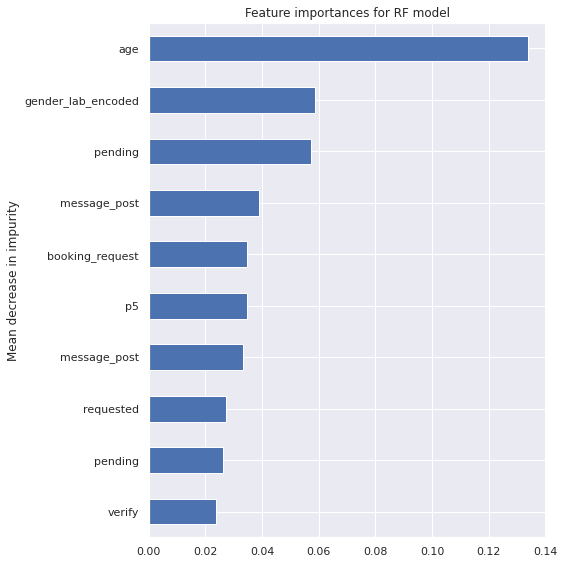

In [ ]:
#RF Feature importance

importances = tuned_rf.feature_importances_
feature_names=X.columns
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values()
fig, ax = plt.subplots(figsize=(8,8))
forest_importances[-10:].plot.barh(ax=ax)          #top 10 features
ax.set_title("Feature importances for RF model")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Over Validation set

In [ ]:
X_val = validating_data_label_encoded
y_val = encoded_y_val

#get top 5 predictions
n=5
top_n_val_tuned_rf = np.argsort(tuned_rf.predict_proba(X_val))[:,:-n-1:-1]

#get scores
print('Tuned RF accuracy on validating set:', tuned_rf.score(X_val, y_val))

preds_val = pd.DataFrame(tuned_rf.predict_proba(X_val), columns=tuned_rf.classes_)
c_val = preds_val.to_numpy()
d_val = pd.get_dummies(y_val).to_numpy()
ndcg_score_val = ndcg_score(c_val, d_val.astype(float), k=5)
print('Tuned RF ndcg_score on validating set:', ndcg_score_val)


Tuned RF accuracy on validating set: 0.6822911022000651
Tuned RF ndcg_score on validating set: 0.7340910885915081


## XGBoost

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.metrics import ndcg_score

In [ ]:
final_column_list = training_data_label_encoded.columns.values

### Over Training set

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

'''param_grid = {
'max_depth': [5, 10, 15, 20, 25, 30, 35, 50],
'n_estimators':[100, 200, 300, 500, 700, 800]
}'''

param_grid = {
'max_depth': [6],
'n_estimators':[25,75,100]
}

xgb = xgb.XGBClassifier(objective='multi:softmax',eval_metric= 'mlogloss')
clf_xgb = RandomizedSearchCV(xgb, param_grid,n_jobs=-1,verbose=2,scoring=ndcg_score, random_state=42,cv = 3)

In [ ]:
X_train = training_data_label_encoded.values
y_train = encoded_y_train

clf_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  category=UserWarning,


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(eval_metric='mlogloss',
                                           objective='multi:softmax'),
                   n_jobs=-1,
                   param_distributions={'max_depth': [6],
                                        'n_estimators': [25, 75, 100]},
                   random_state=42,
                   scoring=<function ndcg_score at 0x7f3530750680>, verbose=2)

In [ ]:
#classification accuracy over training data

clf_xgb.best_params_

{'max_depth': 6, 'n_estimators': 25}

In [ ]:
results = clf_xgb.cv_results_
print(results)

{'mean_fit_time': array([ 323.29054268,  955.44660966, 1147.17671084]), 'std_fit_time': array([  1.46379893,   3.36278101, 121.77861406]), 'mean_score_time': array([0.00070127, 0.00055997, 0.00091497]), 'std_score_time': array([0.00056531, 0.00030482, 0.00040947]), 'param_n_estimators': masked_array(data=[25, 75, 100],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[6, 6, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 25, 'max_depth': 6}, {'n_estimators': 75, 'max_depth': 6}, {'n_estimators': 100, 'max_depth': 6}], 'split0_test_score': array([nan, nan, nan]), 'split1_test_score': array([nan, nan, nan]), 'split2_test_score': array([nan, nan, nan]), 'mean_test_score': array([nan, nan, nan]), 'std_test_score': array([nan, nan, nan]), 'rank_test_score': array([1, 2, 3], dtype=int32)}


In [ ]:
#xgb predictions (with probabilities) on training data
xgb_pred_train = clf_xgb.predict(X_train)
xgb_pred_proba_train = clf_xgb.predict_proba(X_train)
xgb_pred_proba_train

array([[0.0173684 , 0.01771339, 0.0177015 , ..., 0.01684658, 0.10222955,
        0.04442639],
       [0.01760589, 0.01822475, 0.01794355, ..., 0.01707694, 0.09118689,
        0.0333402 ],
       [0.01534815, 0.01565301, 0.01564251, ..., 0.01488703, 0.05560142,
        0.02449001],
       ...,
       [0.01988722, 0.02608496, 0.01980469, ..., 0.01884819, 0.1707517 ,
        0.03878288],
       [0.01508997, 0.0153897 , 0.01537937, ..., 0.0146366 , 0.04842677,
        0.02414769],
       [0.01751287, 0.01786074, 0.01887119, ..., 0.01698671, 0.10924893,
        0.04567564]], dtype=float32)

In [ ]:
#Training ndcg score and accuracy
from sklearn.metrics import accuracy_score

xgb_ndcg_train = ndcg_score(y_true=pd.get_dummies(y_train).to_numpy(),y_score=xgb_pred_proba_train,k=5)
xgb_accuracy_train = accuracy_score(y_train,xgb_pred_train)

print('NDCG score using XGB Classifier on training data:{}'.format(xgb_ndcg_train))
print('Accuracy using XGB Classifier on training data:{}'.format(xgb_accuracy_train))

NDCG score using XGB Classifier on training data:0.8669397224809434
Accuracy using XGB Classifier on training data:0.71503404924044


### Over Validation set

In [ ]:
#predictions (including probabilities) on the validation data
X_val = validating_data_label_encoded.values

xgb_pred_proba_val = clf_xgb.predict_proba(X_val)
xgb_pred_val = clf_xgb.predict(X_val)

In [ ]:
#Validation ndcg score
y_val = encoded_y_val

xgb_ndcg_val = ndcg_score(y_true=pd.get_dummies(y_val).to_numpy(),y_score=xgb_pred_proba_val,k=5)
xgb_accuracy_val = accuracy_score(y_val,xgb_pred_val)

print('NDCG score using XGB Classifier on validation data:{}'.format(xgb_ndcg_val))
print('Accuracy using XGB Classifier on validation data:{}'.format(xgb_accuracy_val))

NDCG score using XGB Classifier on validation data:0.8575492998778609
Accuracy using XGB Classifier on validation data:0.7066218705971605


### Confusion Matrix

In [ ]:
keys = label_encoder_target.classes_
values = label_encoder_target.transform(label_encoder_target.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'AU': 0, 'CA': 1, 'DE': 2, 'ES': 3, 'FR': 4, 'GB': 5, 'IT': 6, 'NDF': 7, 'NL': 8, 'PT': 9, 'US': 10, 'other': 11}


In [ ]:
#getting original labels for training
y_train_dest = label_encoder_target.inverse_transform(encoded_y_train)
xgb_pred_train_dest = label_encoder_target.inverse_transform(xgb_pred_train)

#getting original labels for testing
y_val_dest = label_encoder_target.inverse_transform(y_val)
xgb_pred_val_dest = label_encoder_target.inverse_transform(xgb_pred_val)

In [ ]:
#Confusion matrix for Training
pd.crosstab(y_train_dest,xgb_pred_train_dest)

col_0,AU,CA,DE,ES,FR,GB,IT,NDF,US,other
row_0,,,,,,,,,,
AU,6,0,0,0,0,0,0,48,66,0
CA,0,5,0,0,0,0,0,124,201,0
DE,0,0,3,0,0,0,0,88,101,0
ES,0,0,0,12,0,0,0,218,312,0
FR,0,0,0,0,34,0,0,434,615,0
GB,0,0,0,0,0,2,0,237,330,0
IT,0,0,0,0,0,0,14,308,432,0
NDF,0,0,0,0,0,0,0,29712,4009,0
NL,0,0,0,0,0,0,0,62,118,0


In [ ]:
#Confusion matrix for Validation
pd.crosstab(y_val_dest,xgb_pred_val_dest)

col_0,AU,CA,ES,IT,NDF,US,other
row_0,,,,,,,
AU,0,0,0,0,13,19,0
CA,0,0,0,0,44,65,1
DE,0,0,0,0,23,34,1
ES,0,0,0,0,72,93,0
FR,0,0,0,0,138,214,0
GB,0,0,0,0,61,101,0
IT,1,0,0,0,82,142,0
NDF,0,0,0,1,9897,1422,0
NL,0,0,0,0,31,36,0


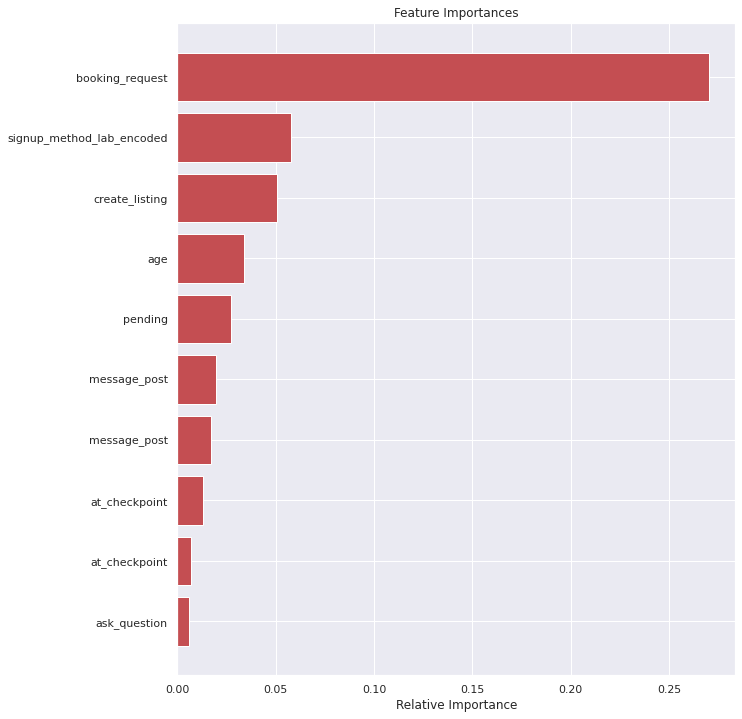

In [ ]:
#feature importance plot using xgboost

features = final_column_list
importances = clf_xgb.best_estimator_.feature_importances_
indices = (np.argsort(importances))[-10:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X_train = training_data_one_hot_encoded
X_val = validating_data_one_hot_encoded
y_train = encoded_y_train_one_hot
y_val = encoded_y_val_one_hot

In [ ]:
params =  {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

nb = MultinomialNB()
clf_nb = RandomizedSearchCV(nb, params, verbose=10, n_iter=3 ,n_jobs=-1,scoring=ndcg_score)

clf_nb.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  category=UserWarning,


RandomizedSearchCV(estimator=MultinomialNB(), n_iter=3, n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1, 10, 100]},
                   scoring=<function ndcg_score at 0x7f3530750680>, verbose=10)

In [ ]:
clf_nb.best_estimator_

MultinomialNB(alpha=0.01)

### Training Data

In [ ]:
#nb predictions (with probabilities) on training data
nb_pred_train = clf_nb.predict(X_train)
nb_pred_proba_train = clf_nb.predict_proba(X_train)
nb_pred_proba_train

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        4.07058297e-134, 1.67763098e-241, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 2.69810703e-304, ...,
        9.26927168e-073, 3.75525595e-134, 2.07013506e-321],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        3.91629208e-214, 0.00000000e+000, 0.00000000e+000],
       [5.71707987e-040, 3.29184181e-072, 5.00286765e-046, ...,
        3.54953702e-017, 2.73151924e-025, 1.47863462e-040],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [ ]:
#Training ndcg score and accuracy
from sklearn.metrics import accuracy_score

nb_ndcg_train = ndcg_score(y_true=pd.get_dummies(y_train).to_numpy(),y_score=nb_pred_proba_train,k=5)
nb_accuracy_train = accuracy_score(y_train,nb_pred_train)

print('NDCG score using NB Classifier on training data:{}'.format(nb_ndcg_train))
print('Accuracy using NB Classifier on training data:{}'.format(nb_accuracy_train))

NDCG score using NB Classifier on training data:0.4471170579614186
Accuracy using NB Classifier on training data:0.3153878926372052


### Validation Data

In [ ]:
#nb predictions (with probabilities) on validation data
nb_pred_val = clf_nb.predict(X_val)
nb_pred_proba_val = clf_nb.predict_proba(X_val)

In [ ]:
#Training ndcg score and accuracy
from sklearn.metrics import accuracy_score

nb_ndcg_val = ndcg_score(y_true=pd.get_dummies(y_val).to_numpy(),y_score=nb_pred_proba_val,k=5)
nb_accuracy_val = accuracy_score(y_val,nb_pred_val)

print('NDCG score using NB Classifier on Validation data:{}'.format(nb_ndcg_val))
print('Accuracy using NB Classifier on Validation data:{}'.format(nb_accuracy_val))

NDCG score using NB Classifier on Validation data:0.44405266481735517
Accuracy using NB Classifier on Validation data:0.313588850174216


In [ ]:
#getting original labels for training
y_train_dest = label_encoder_target.inverse_transform(encoded_y_train_one_hot)
nb_pred_train_dest = label_encoder_target.inverse_transform(nb_pred_train)

#getting original labels for testing
y_val_dest = label_encoder_target.inverse_transform(encoded_y_val_one_hot)
nb_pred_val_dest = label_encoder_target.inverse_transform(nb_pred_val)

### Confusion Matrix

In [ ]:
#Confusion matrix for Training
pd.crosstab(y_train_dest,nb_pred_train_dest)

col_0,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
row_0,,,,,,,,,,,,
AU,0,22,1,1,2,0,0,53,0,1,0,1
CA,1,66,0,3,1,4,3,113,0,1,1,1
DE,1,43,1,2,4,3,3,67,1,3,1,1
ES,2,118,1,10,5,3,3,158,2,4,6,3
FR,9,252,2,5,8,8,7,311,1,1,1,12
GB,8,115,6,4,8,2,6,182,0,6,3,2
IT,5,175,3,1,3,5,5,194,0,6,4,5
NDF,96,3402,64,136,180,121,153,7911,26,67,136,142
NL,1,41,0,0,2,2,1,63,1,1,1,0


In [ ]:
#Confusion matrix for Validation
pd.crosstab(y_val_dest,nb_pred_val_dest)

col_0,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
row_0,,,,,,,,,,,,
AU,0,10,0,0,0,0,0,11,0,0,0,1
CA,0,21,1,3,0,1,0,33,0,2,2,1
DE,1,16,0,2,0,0,2,20,0,0,1,1
ES,5,36,1,3,1,0,1,55,0,1,2,2
FR,1,90,3,2,4,2,2,102,1,1,1,2
GB,1,34,2,1,2,1,4,58,0,1,0,1
IT,1,44,0,1,2,4,2,51,5,3,2,0
NDF,34,1082,18,47,63,45,46,2627,3,34,49,58
NL,0,18,0,0,0,1,1,21,0,0,0,0


## LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ndcg_score

params = {
'n_estimators' : [800],
'max_depth' : [12],
'num_leaves' : [20]}

model_lgbm = lgb.LGBMClassifier(objective='multiclass',
                    boosting_type='gbdt',
                    n_jobs=-1,
                    learning_rate=0.01,
                    tree_learner='serial',
                    colsample_bytree= 0.7,
                    subsample_freq=1,
                    subsample=0.7,
                    max_bin=255,
                    verbose=-1) 


cv_lgbm= RandomizedSearchCV(model_lgbm, params, verbose=10,n_jobs=-1,random_state=42,cv=3,return_train_score=True)



cv_lgbm.fit(training_data_label_encoded,encoded_y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(colsample_bytree=0.7,
                                            learning_rate=0.01, max_bin=255,
                                            objective='multiclass',
                                            subsample=0.7, subsample_freq=1,
                                            tree_learner='serial', verbose=-1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [12],
                                        'n_estimators': [800],
                                        'num_leaves': [20]},
                   random_state=42, return_train_score=True, verbose=10)

### Over Training set

In [ ]:
print(ndcg_score(y_true=pd.get_dummies(encoded_y_train ).to_numpy(),y_score=cv_lgbm.predict_proba(training_data_label_encoded),k=5))
print(ndcg_score(y_true=pd.get_dummies(encoded_y_val).to_numpy(),y_score=cv_lgbm.predict_proba(validating_data_label_encoded),k=5))

0.88283497378374
0.8584958596075885


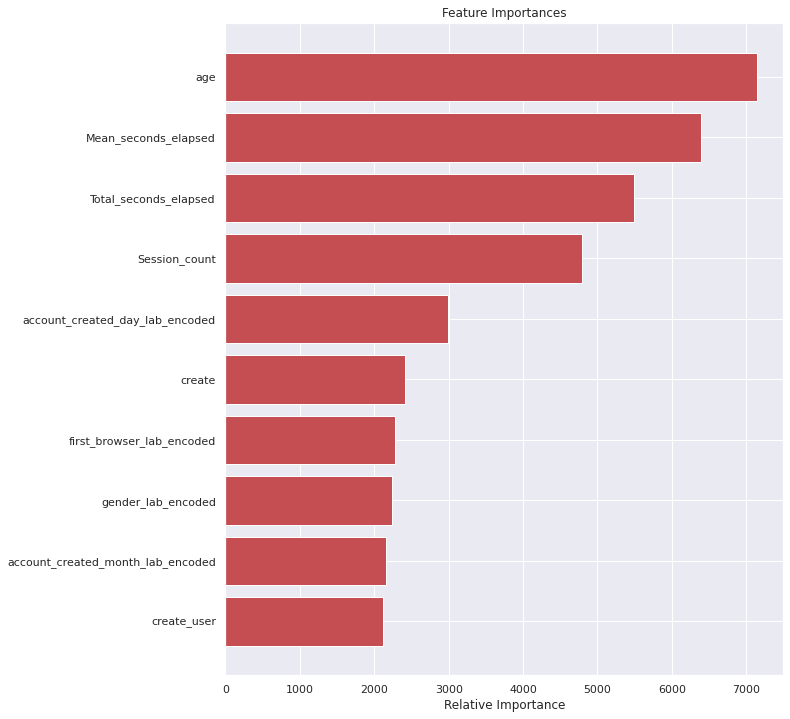

In [ ]:
X_val.columns

features =validating_data_label_encoded.columns.values
importances = cv_lgbm.best_estimator_.feature_importances_
indices = (np.argsort(importances))[-10:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier 

etc=ExtraTreesClassifier(criterion="entropy")


params = {
'n_estimators' : [600,800],
'max_depth' : [12,14,16]}

etc=ExtraTreesClassifier(criterion="entropy")


cv_etc= RandomizedSearchCV(etc, params, verbose=10,n_jobs=-1,random_state=42,cv=3,return_train_score=True)
cv_etc.fit(training_data_label_encoded,encoded_y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(criterion='entropy'),
                   n_jobs=-1,
                   param_distributions={'max_depth': [12, 14, 16],
                                        'n_estimators': [600, 800]},
                   random_state=42, return_train_score=True, verbose=10)

0.8941350477546353
0.8471184173663742


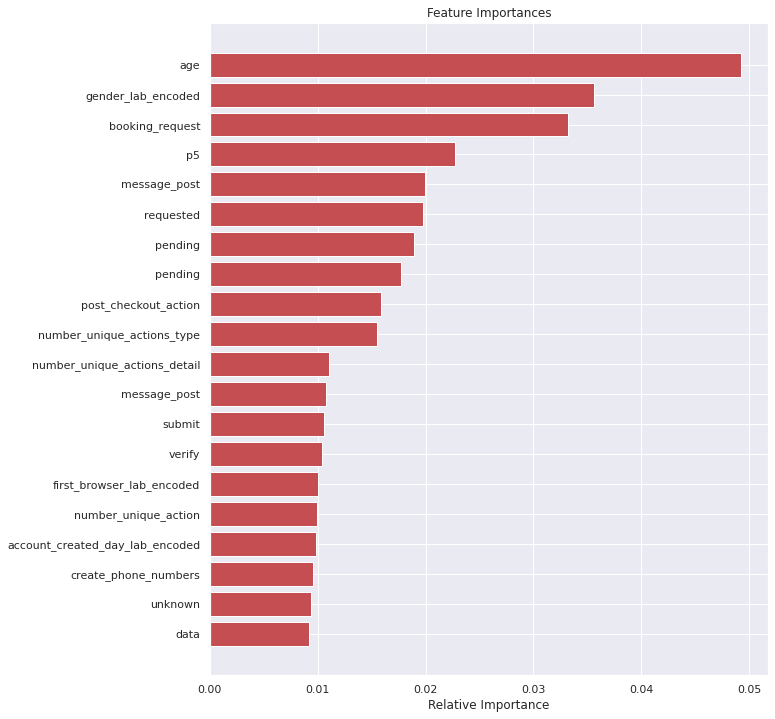

In [ ]:
print(ndcg_score(y_true=pd.get_dummies(encoded_y_train).to_numpy(),y_score=cv_etc.predict_proba(training_data_label_encoded),k=5))
print(ndcg_score(y_true=pd.get_dummies(encoded_y_val).to_numpy(),y_score=cv_etc.predict_proba(validating_data_label_encoded),k=5))


X_val.columns

features =validating_data_label_encoded.columns.values
importances = cv_etc.best_estimator_.feature_importances_
indices = (np.argsort(importances))[-20:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()